In [1]:
import scipy.io as spio
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import math

In [2]:
def convert_data2org(cur_mat, maxV = 25.0):
    import numpy as np
    #cur_mat = cur_mat * maxV;
    x = np.exp(cur_mat) - 1.0;

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)

    neg_idx = x < 0.0
    x[neg_idx] = 0.0

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)
    
    return x

In [3]:
def plot_results(noisy, nn_output, clean, title=None):
    import numpy as np
    plt.figure(1, figsize=(20,20))
    #if title: plt.suptitle(title, fontsize=16)

    ax = plt.subplot(1, 3, 1)
    ax.set_title("noisy (1e5)")
    #ax.imshow(np.log10(noisy), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(noisy), interpolation='none')
    
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Neural Nets")
#     ax.imshow(np.log10(nn_output), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(nn_output), interpolation='none')
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("clean (1e8)")
#     ax.imshow(np.log10(clean), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(clean), interpolation='none')

    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.9, top=0.88, wspace=0.2, hspace=0.2)
    #plt.subplot_tool()
    plt.show()


### load NN results on 3D voxel images

In [4]:
nn_mat = spio.loadmat('./test_results/test-homo.mat', squeeze_me=True)
nn_mat = nn_mat['output_clean']

In [5]:
nn_mat.shape

(100, 100, 100)

In [6]:
maxV = spio.loadmat('maxV.mat', squeeze_me=True)  # the output is a dict    
maxV = maxV['maxV']                                                         
print maxV 

25.0


In [7]:
np.amin(nn_mat)

0.008049079

### image by image comparison

 image 1



/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


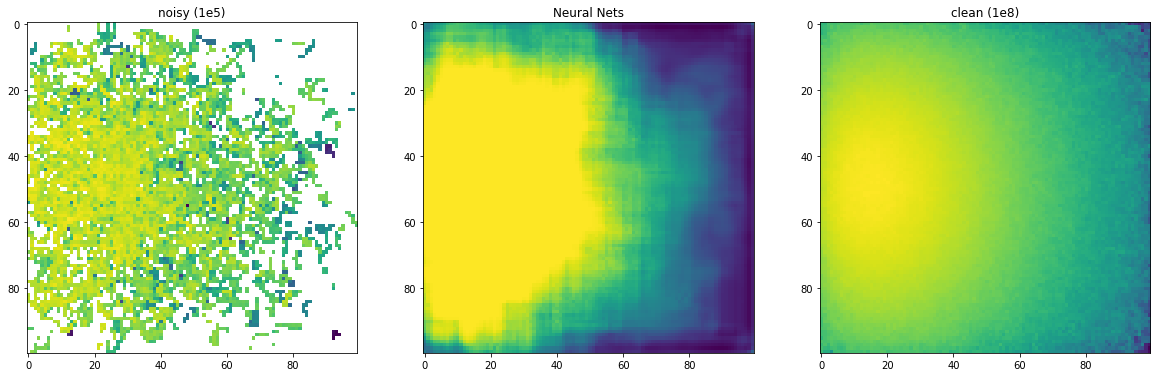

 image 2



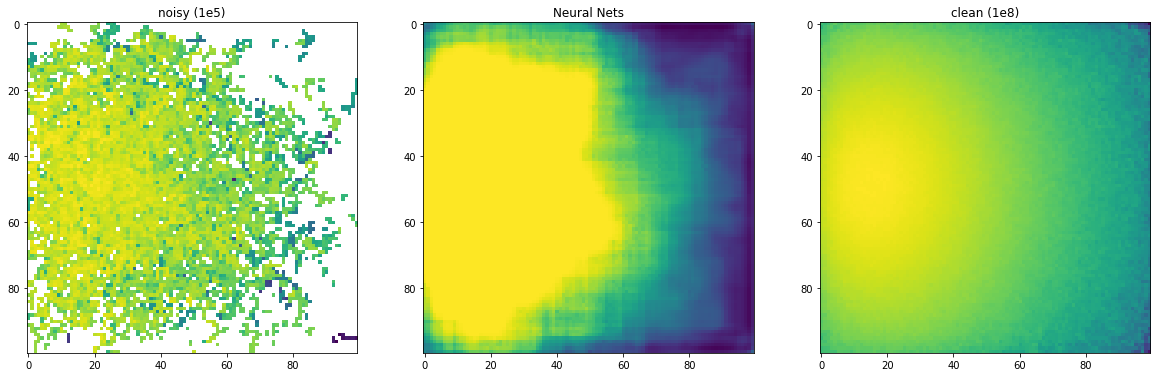

 image 3



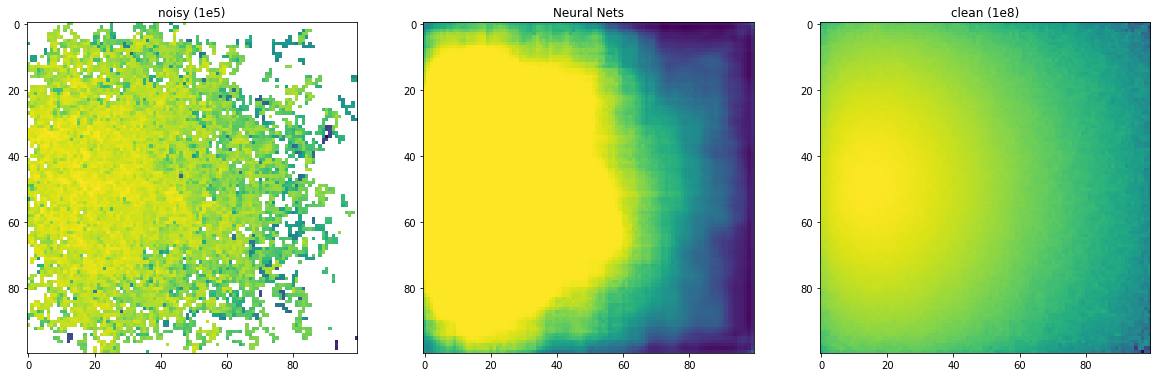

 image 4



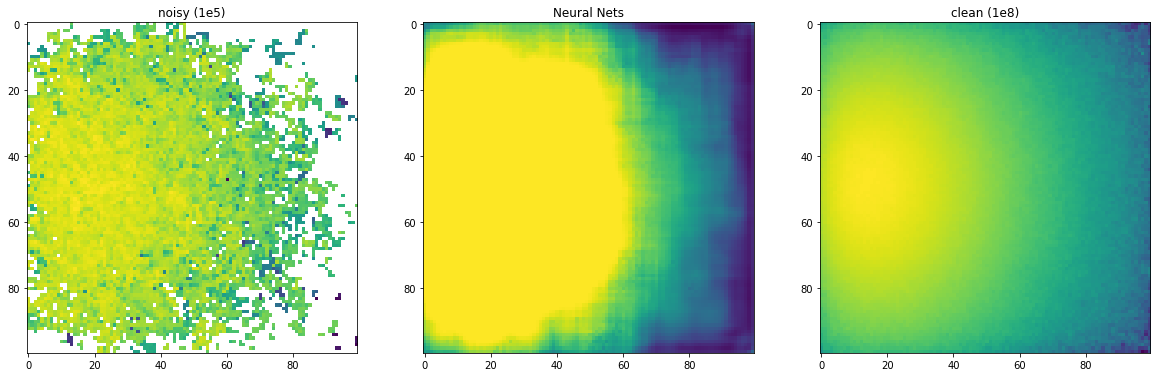

 image 5



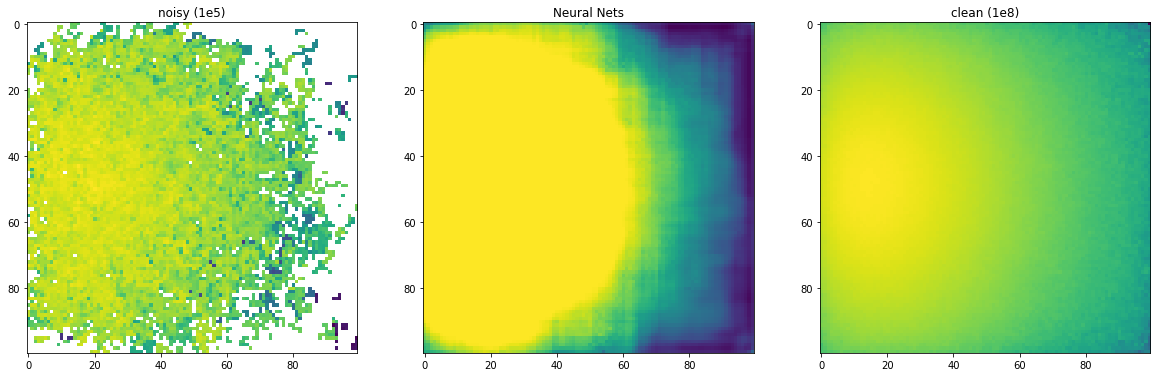

 image 6



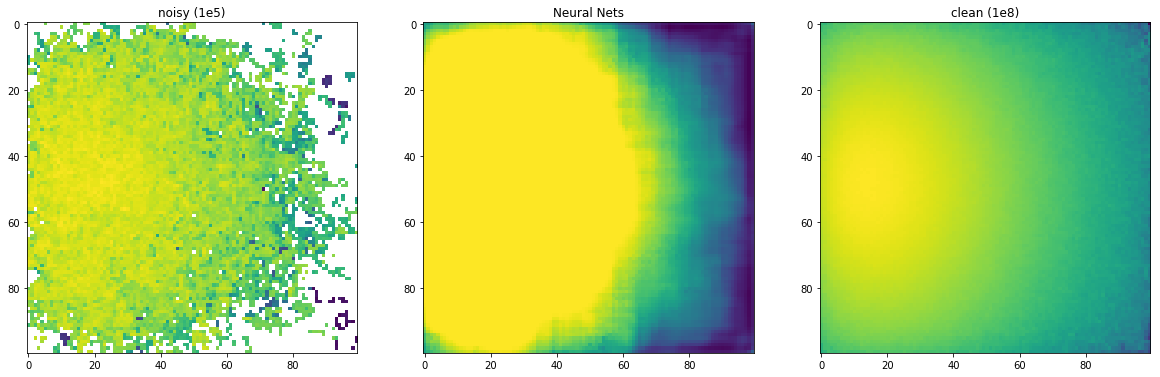

 image 7



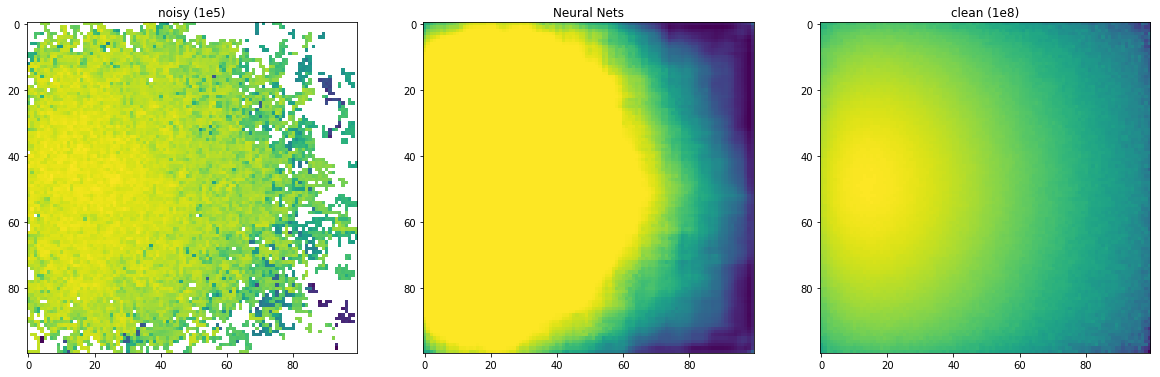

 image 8



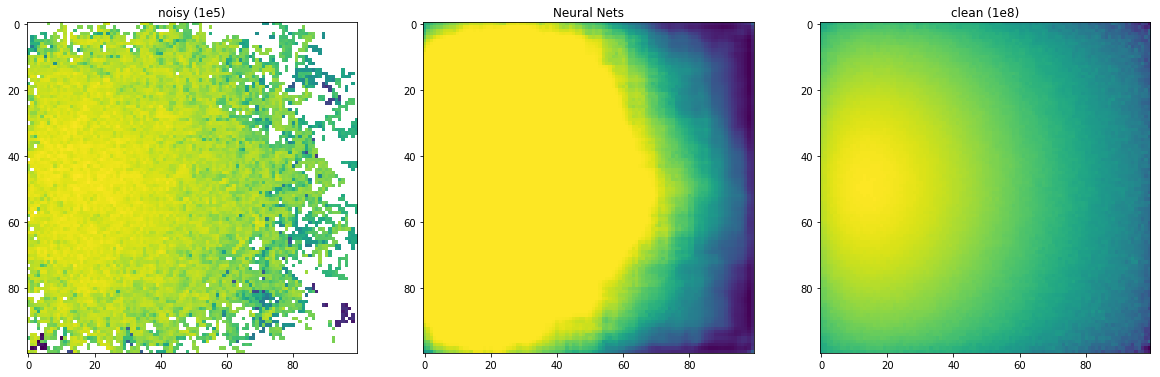

 image 9



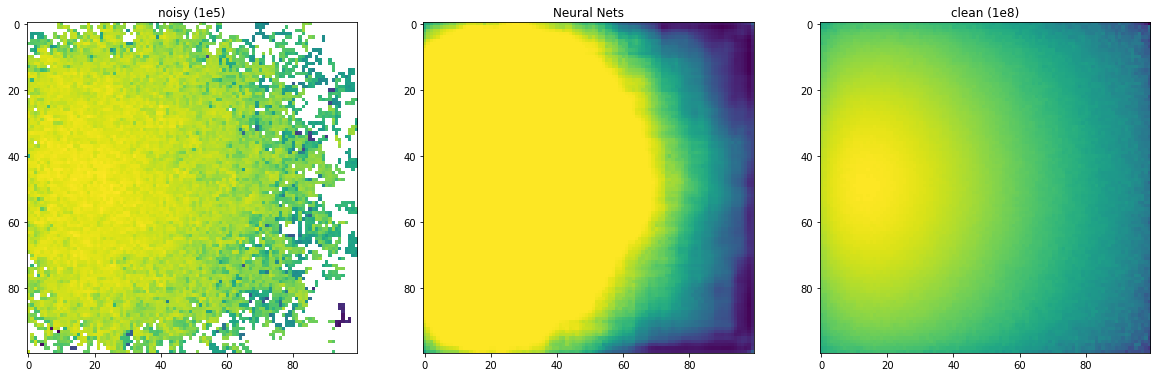

 image 10



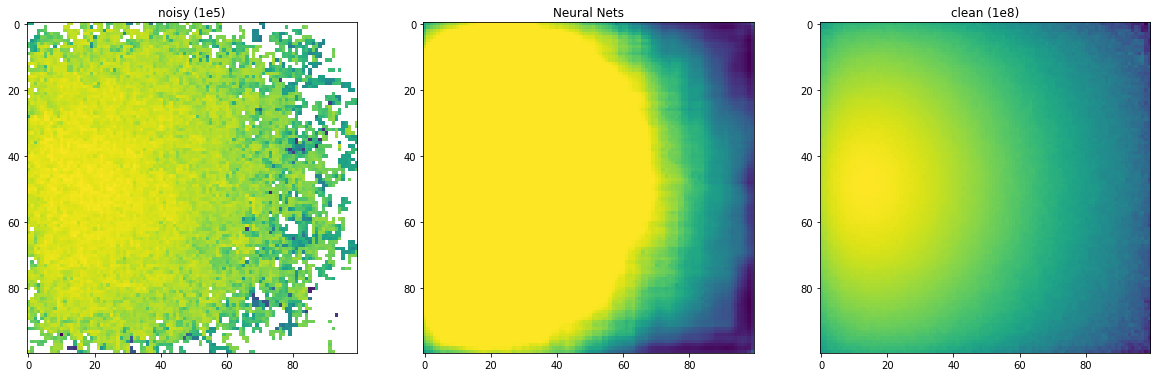

 image 11



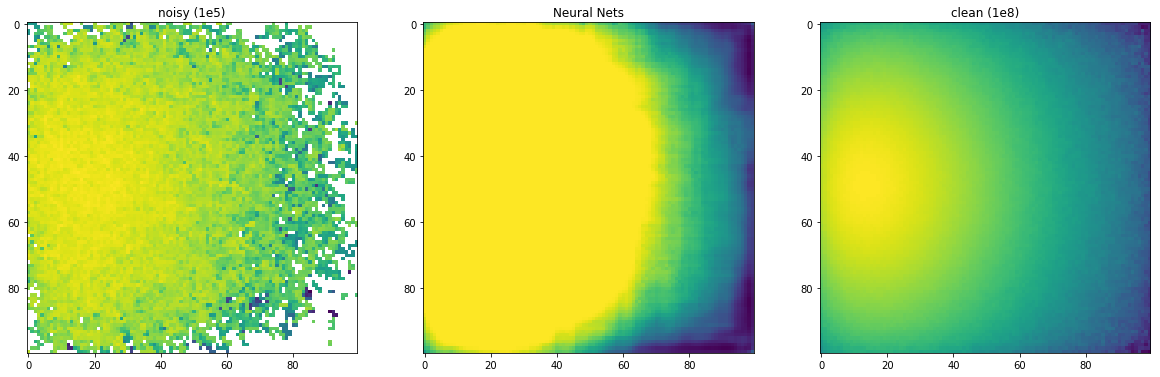

 image 12



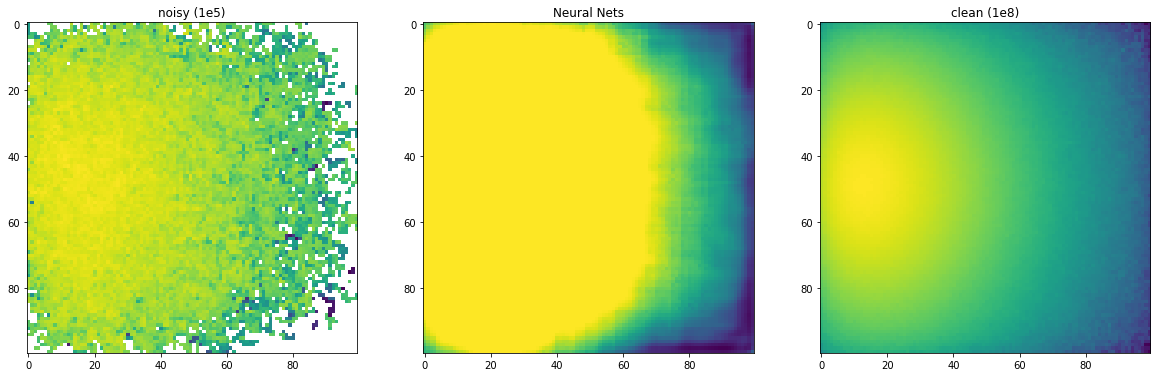

 image 13



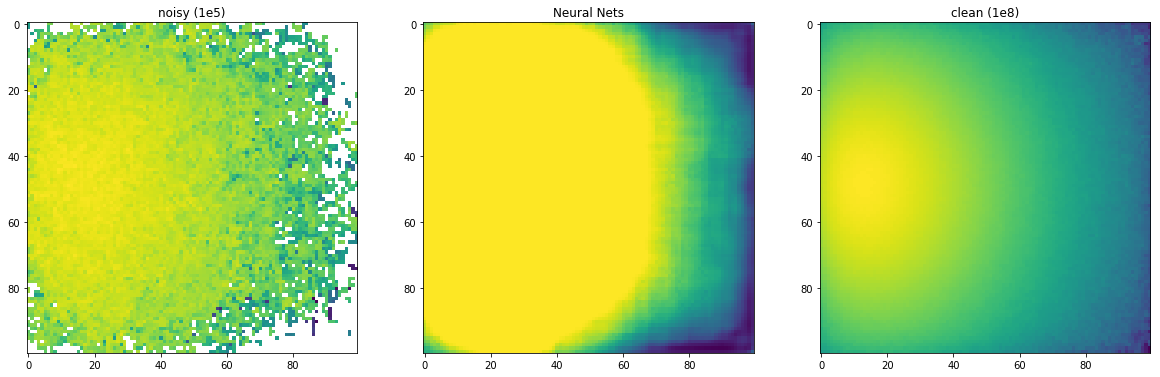

 image 14



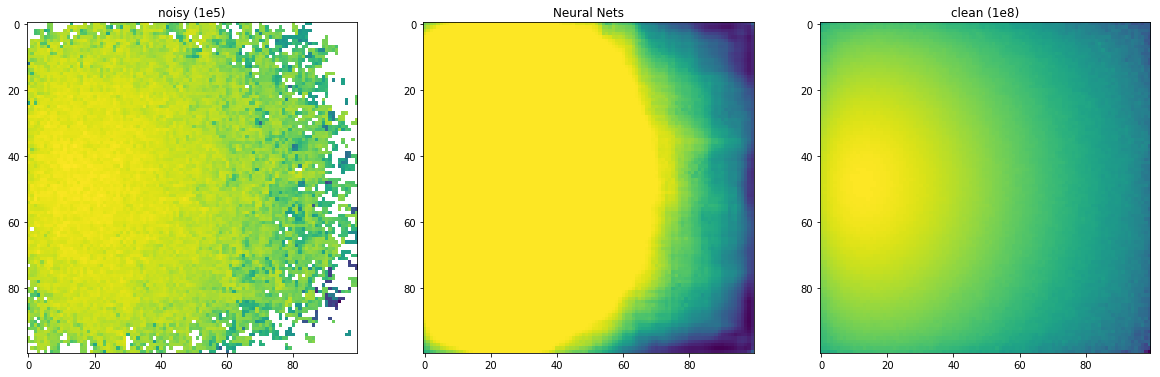

 image 15



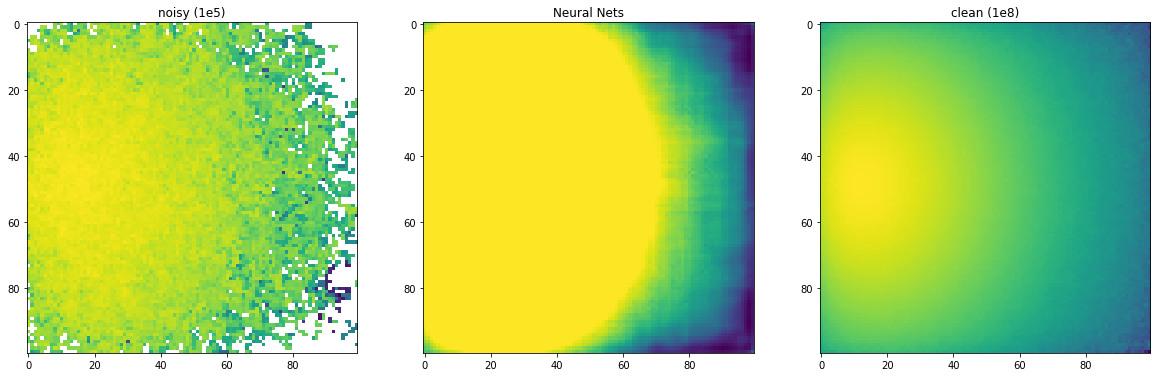

 image 16



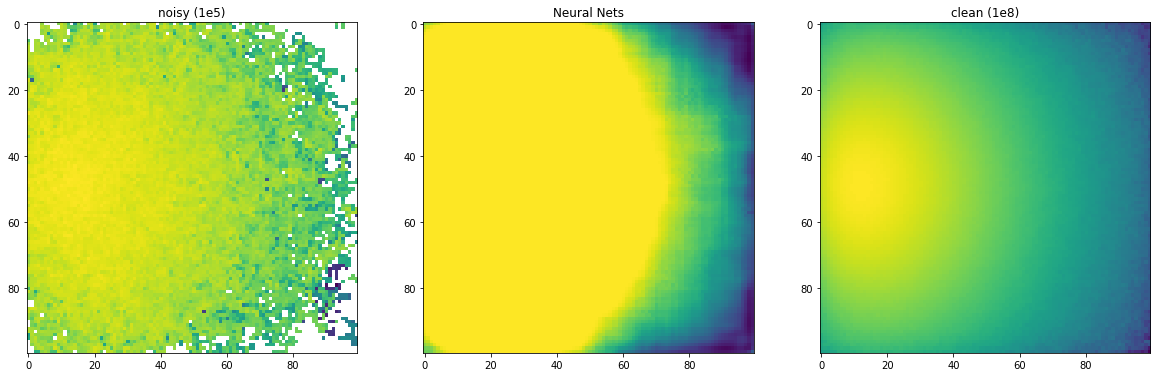

 image 17



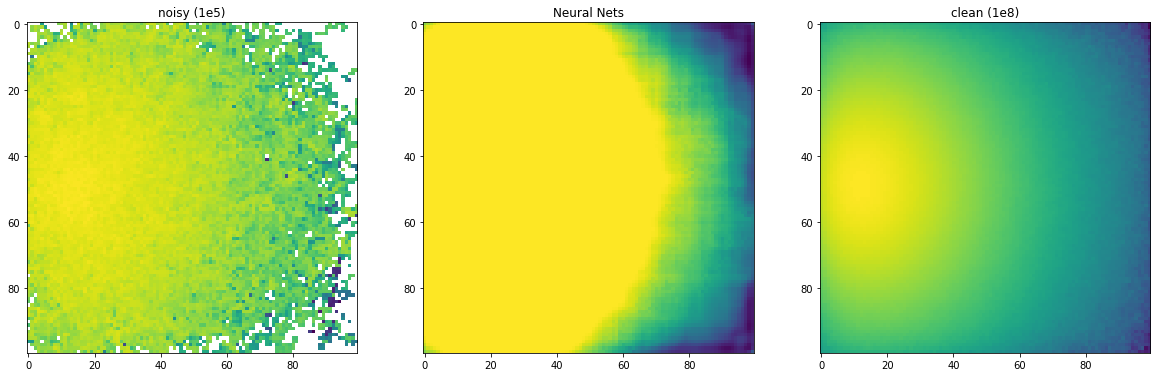

 image 18



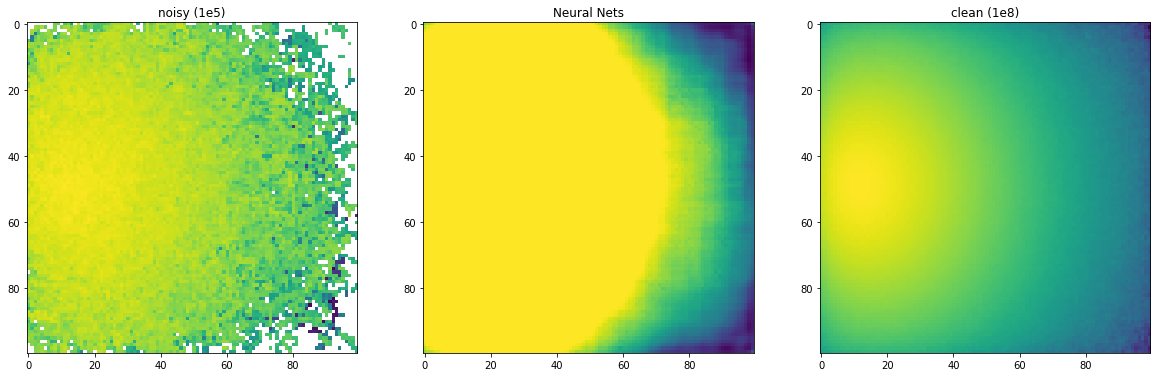

 image 19



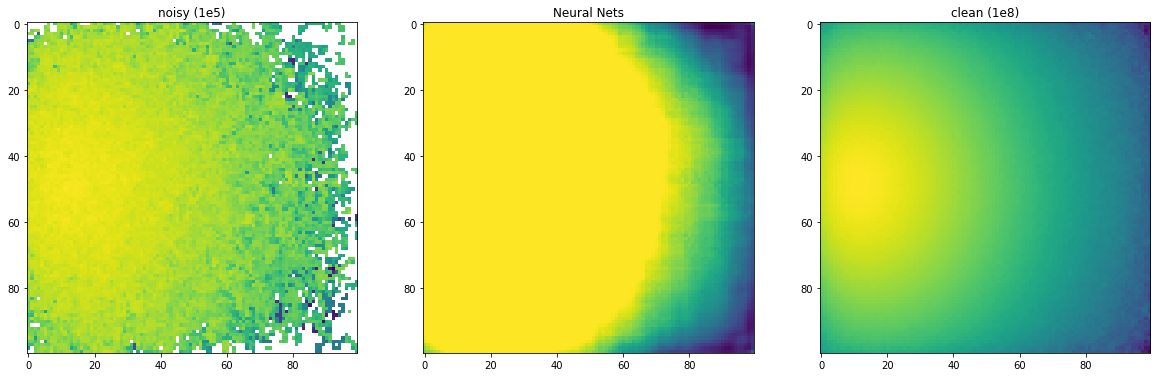

 image 20



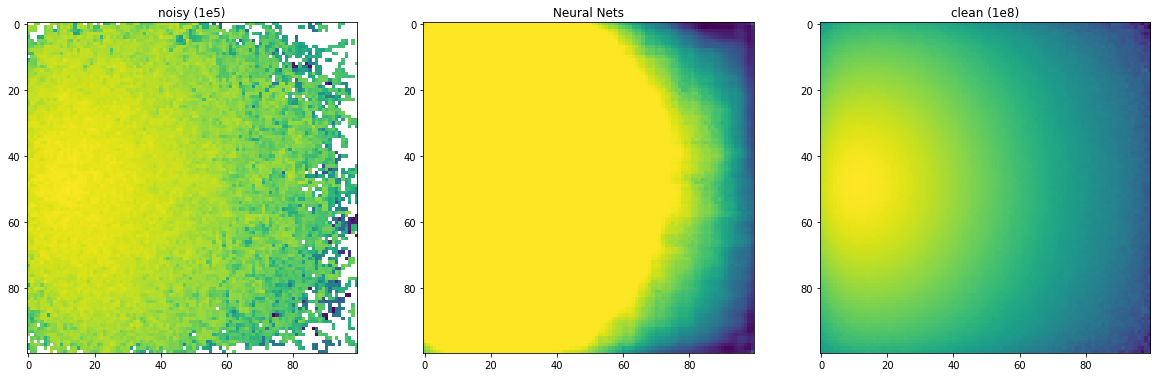

 image 21



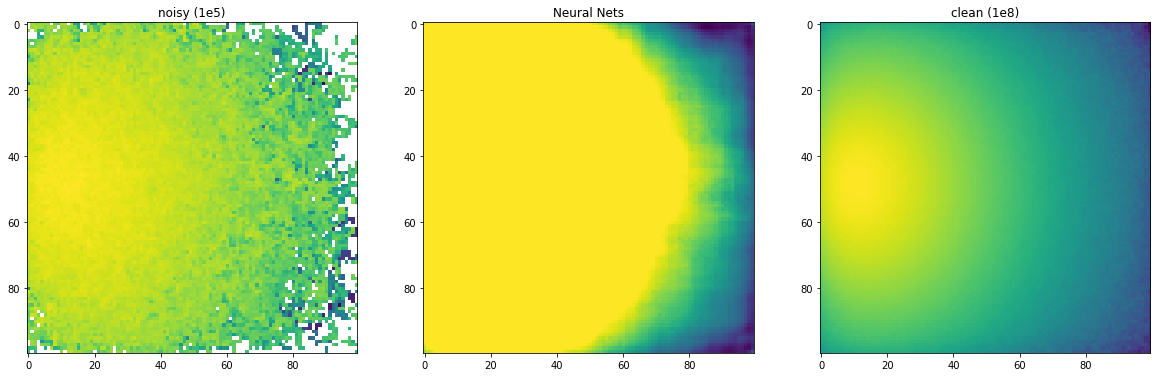

 image 22



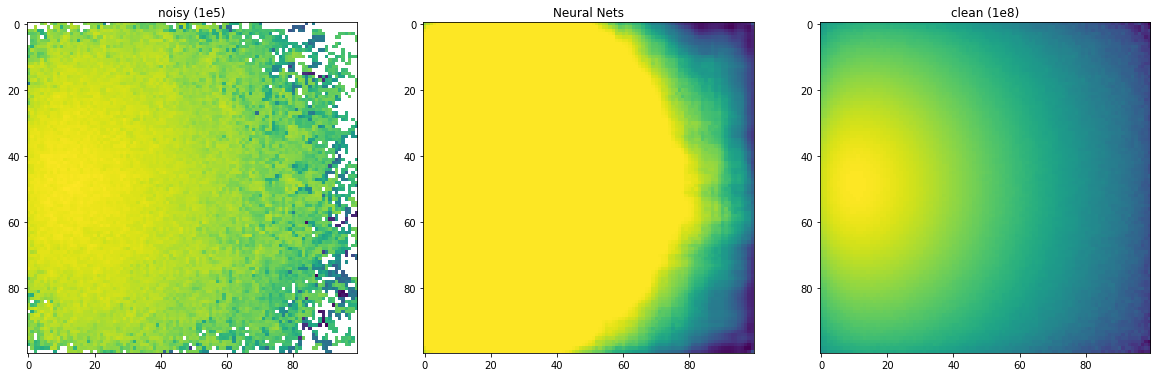

 image 23



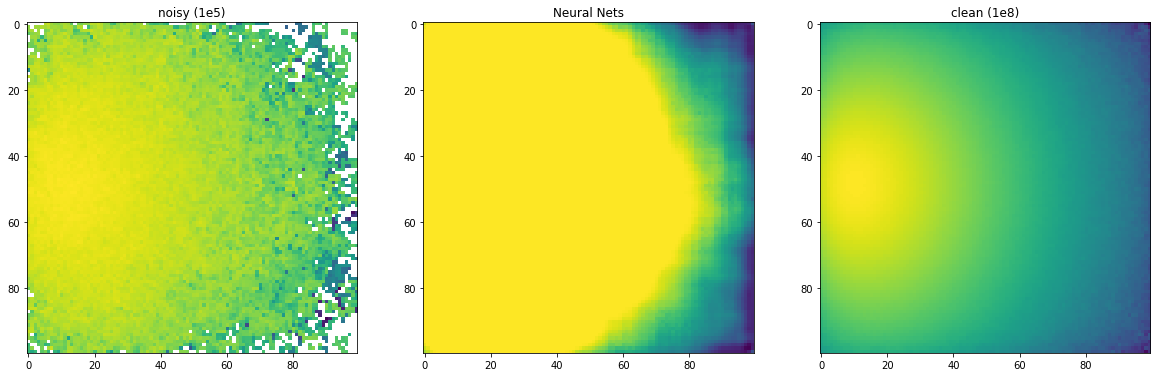

 image 24



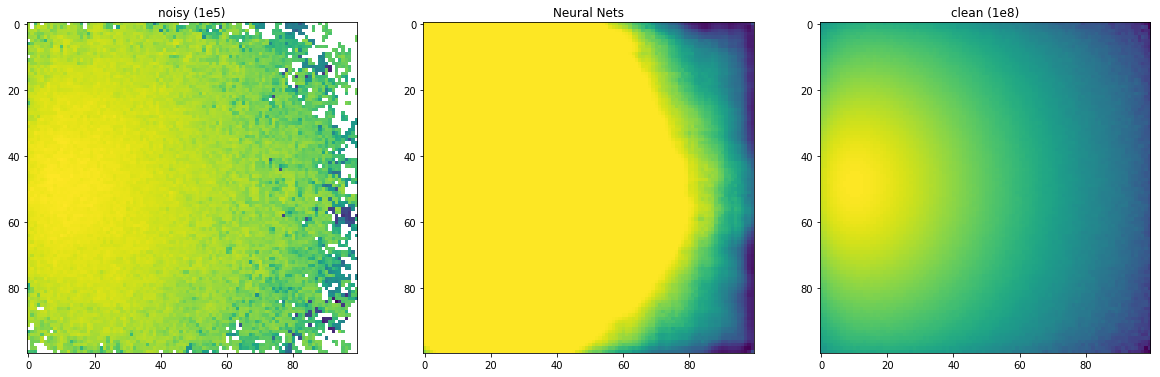

 image 25



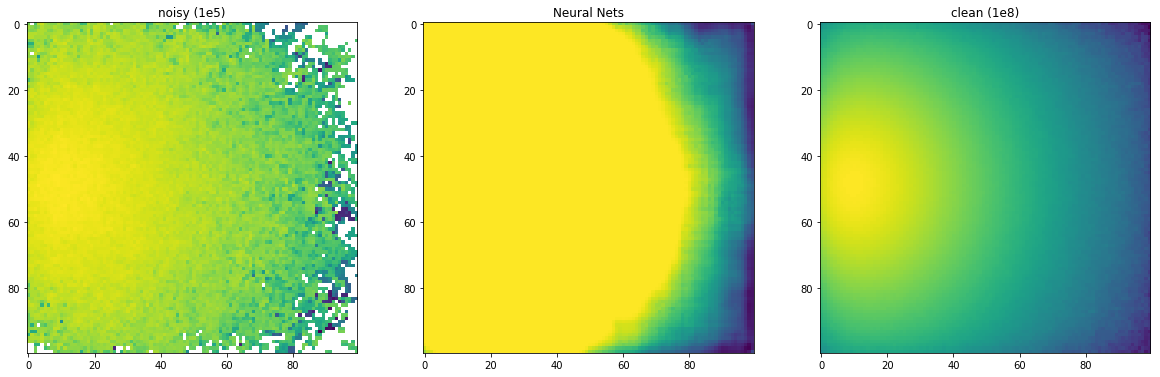

 image 26



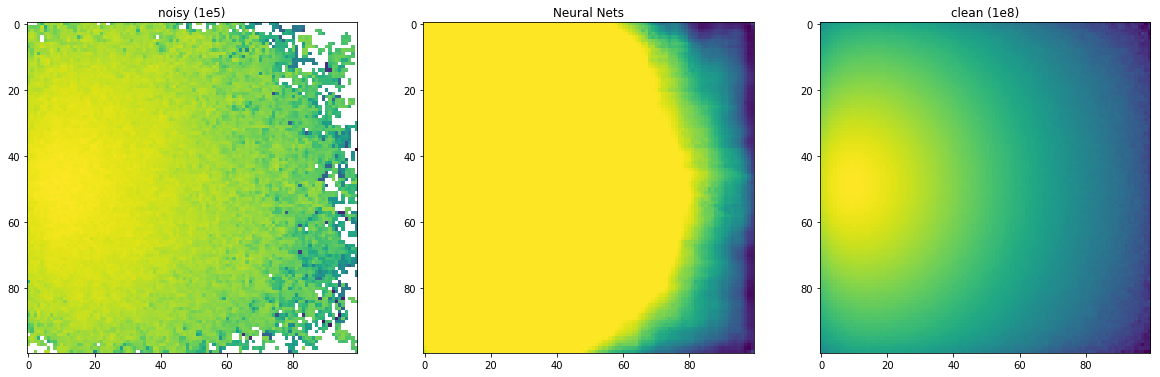

 image 27



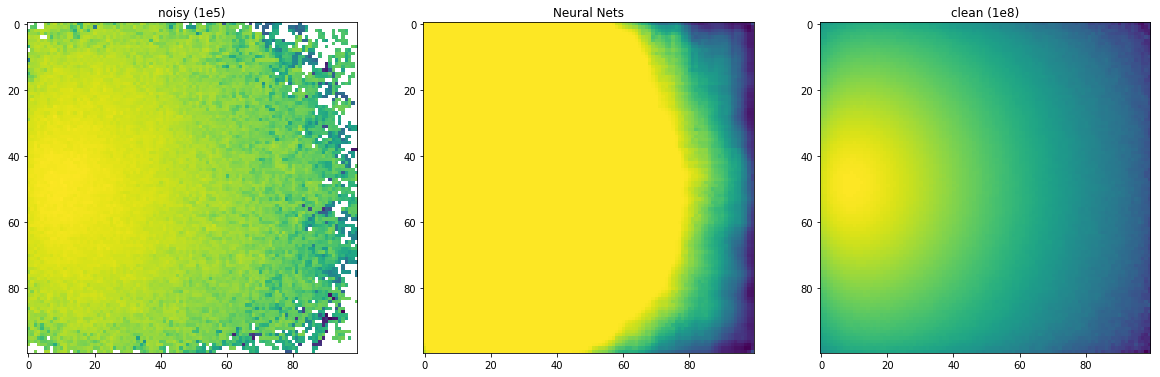

 image 28



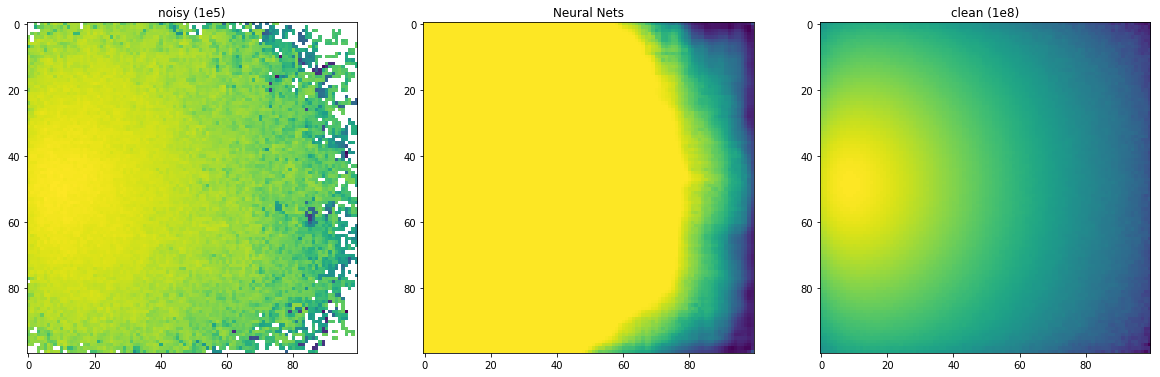

 image 29



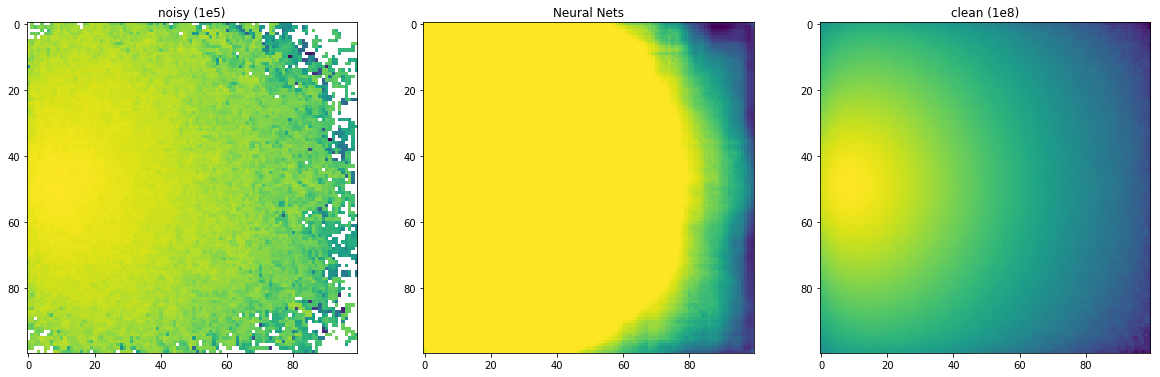

 image 30



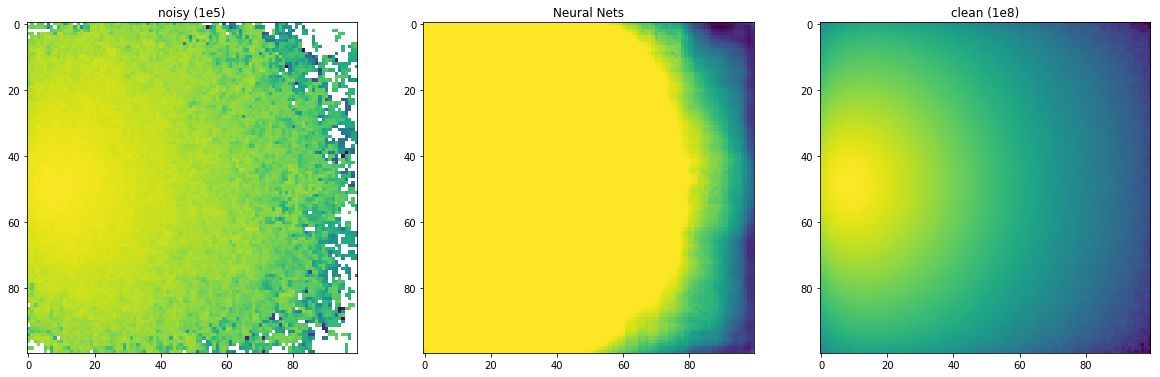

 image 31



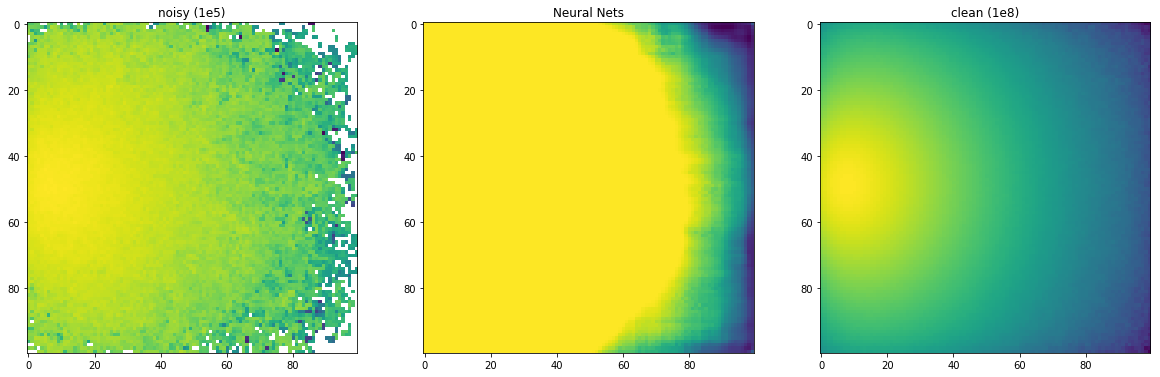

 image 32



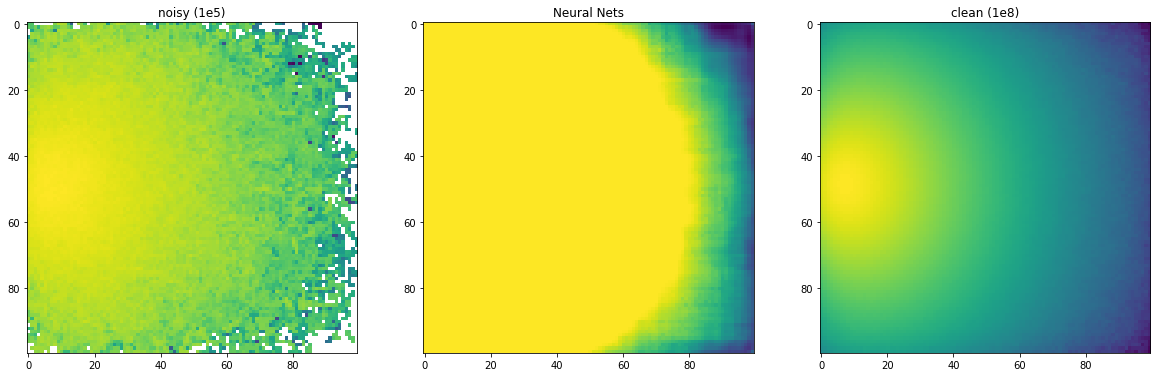

 image 33



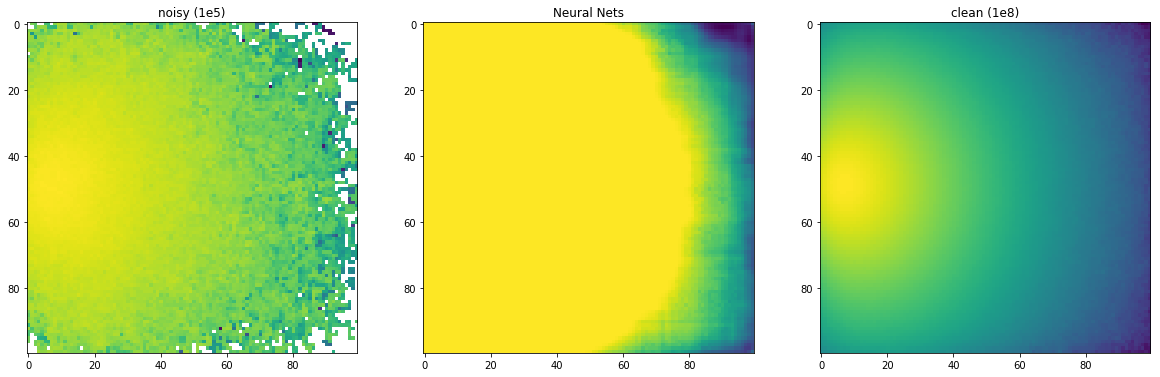

 image 34



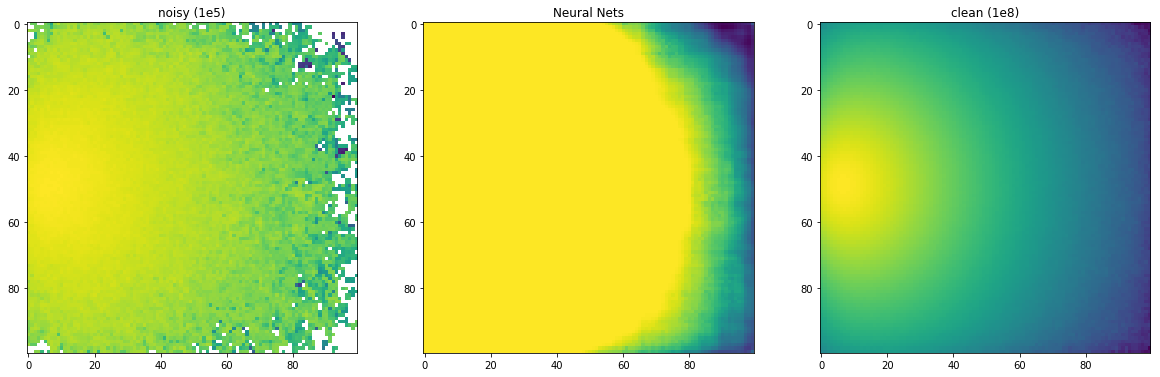

 image 35



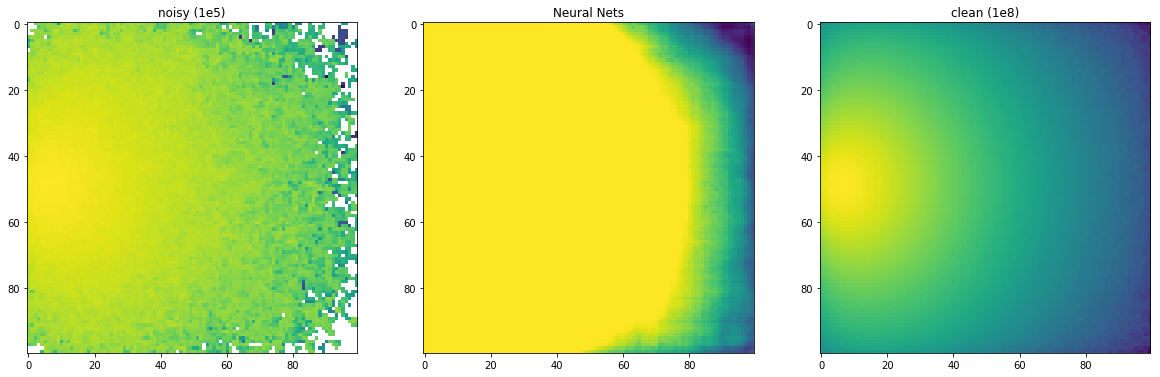

 image 36



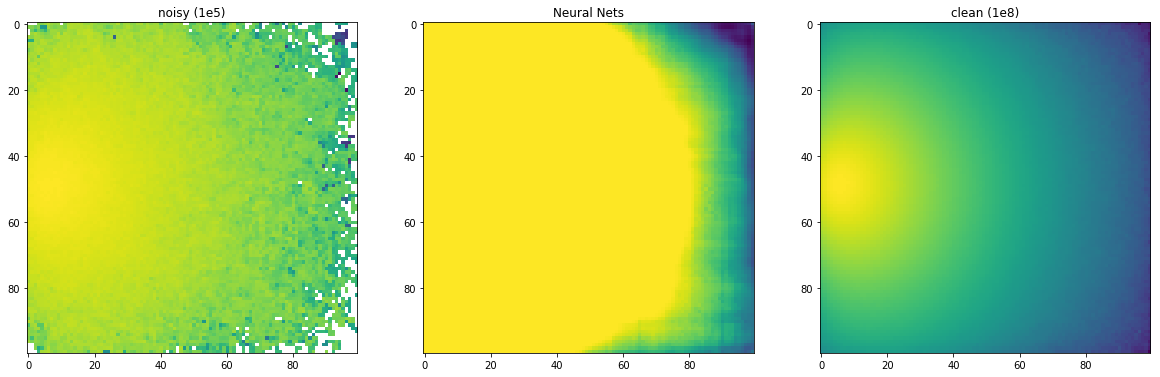

 image 37



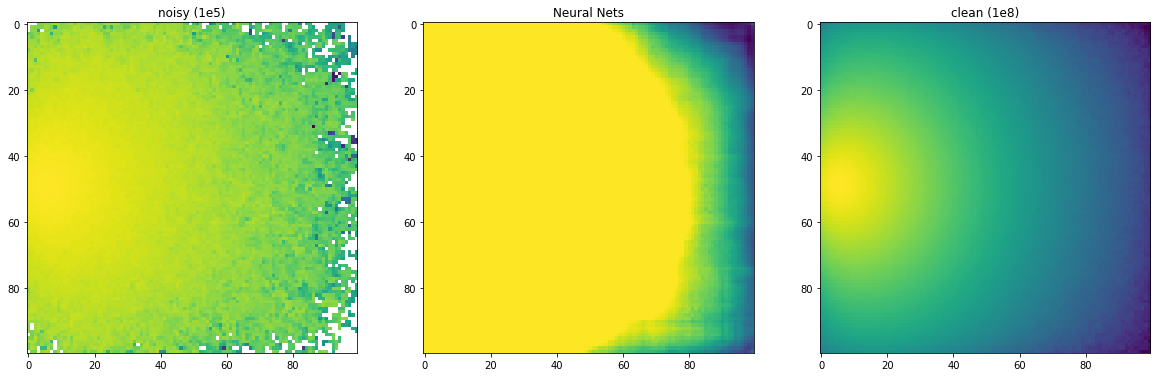

 image 38



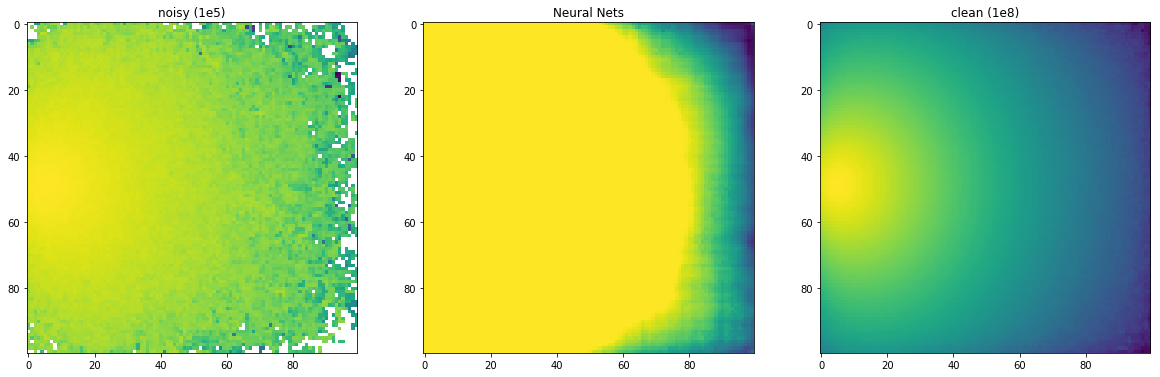

 image 39



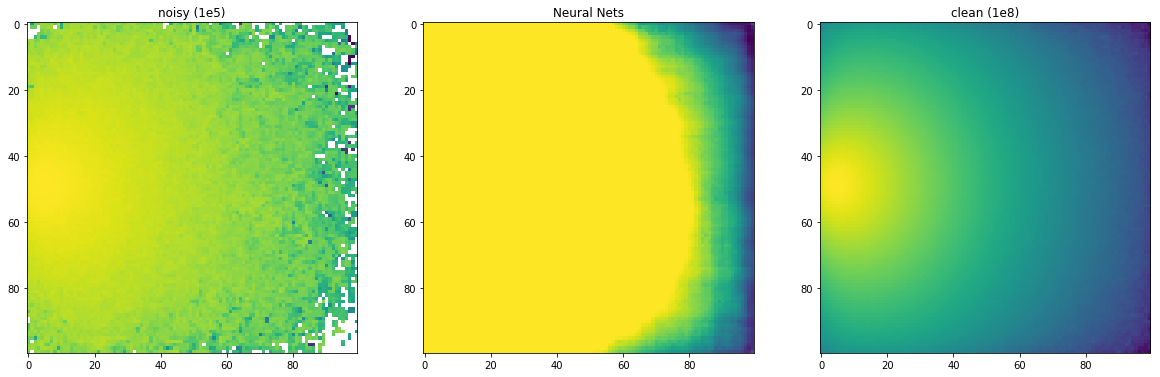

 image 40



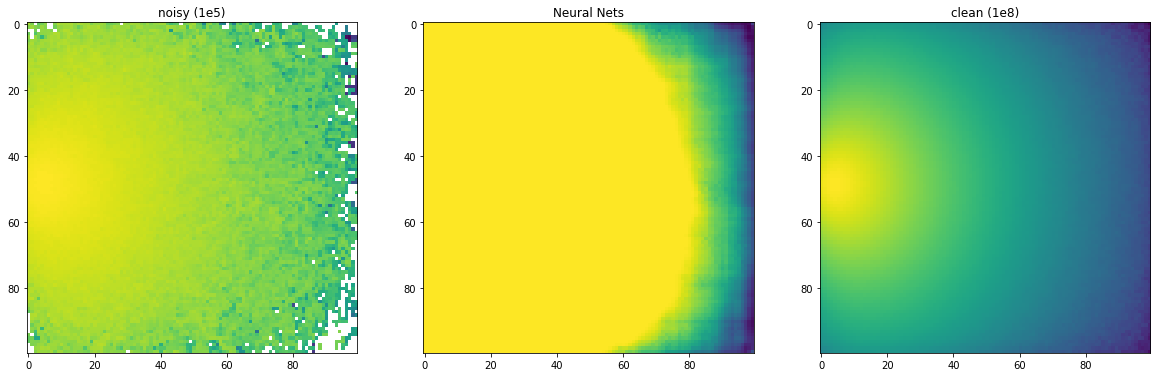

 image 41



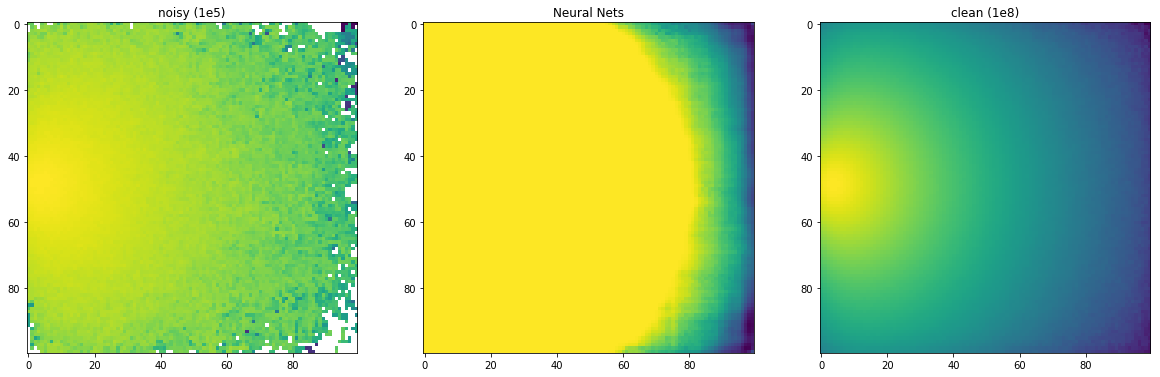

 image 42



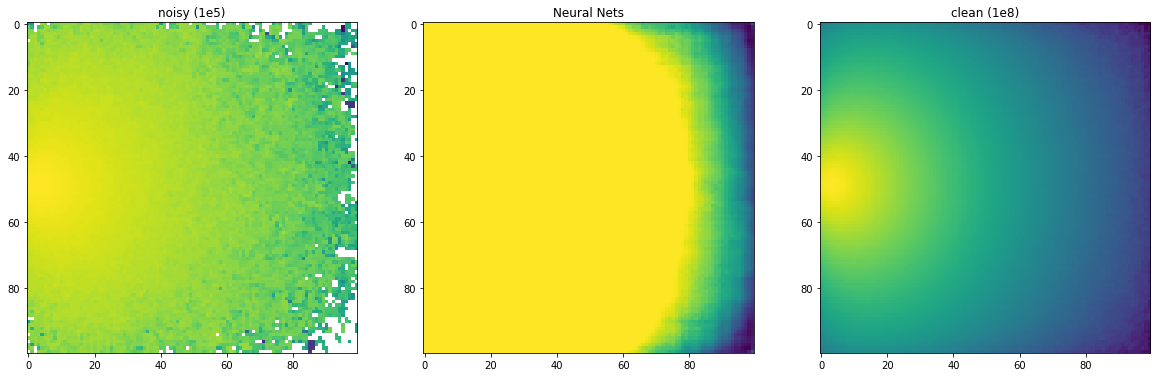

 image 43



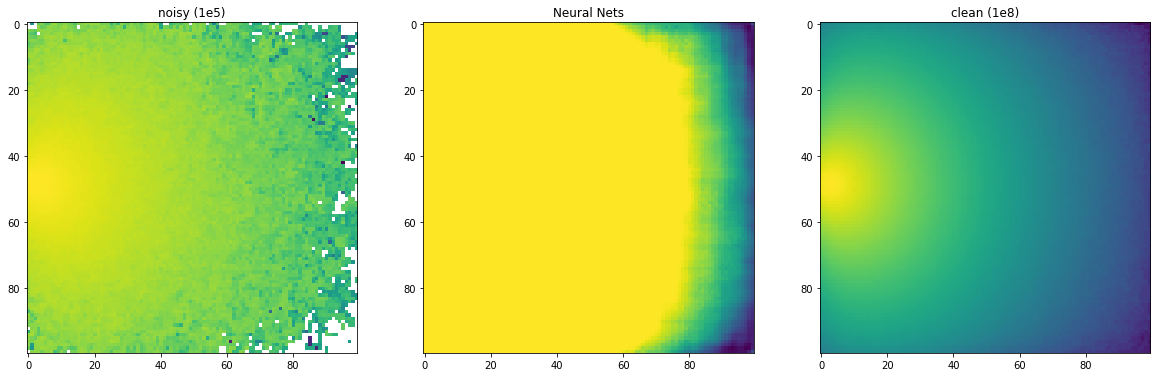

 image 44



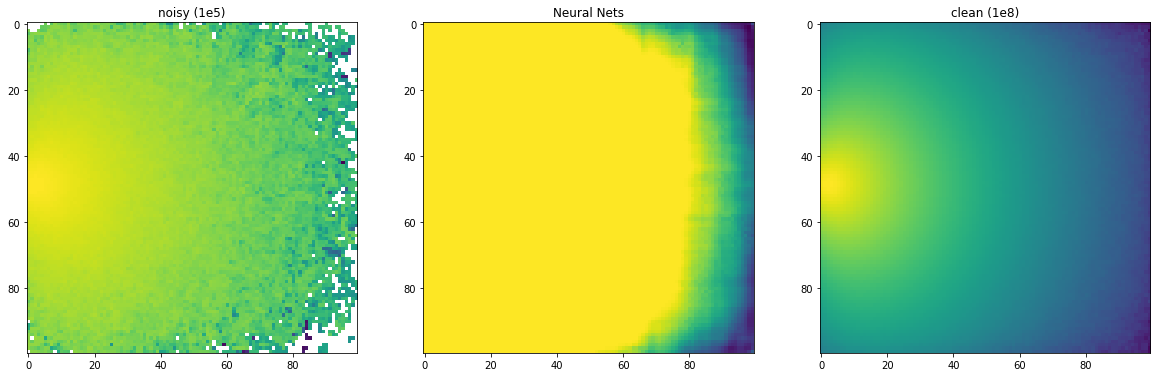

 image 45



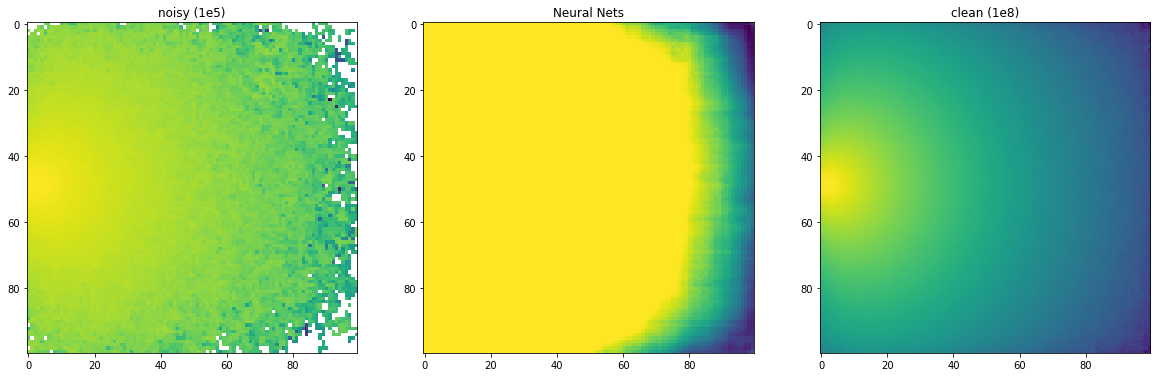

 image 46



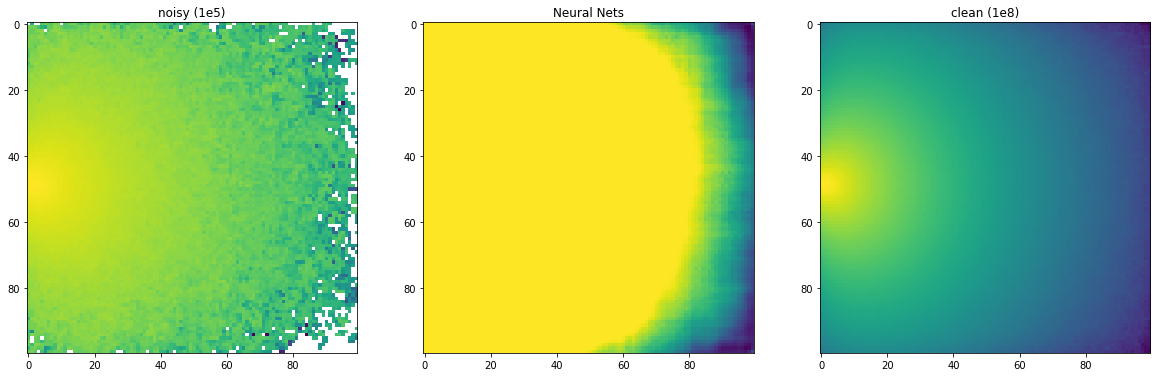

 image 47



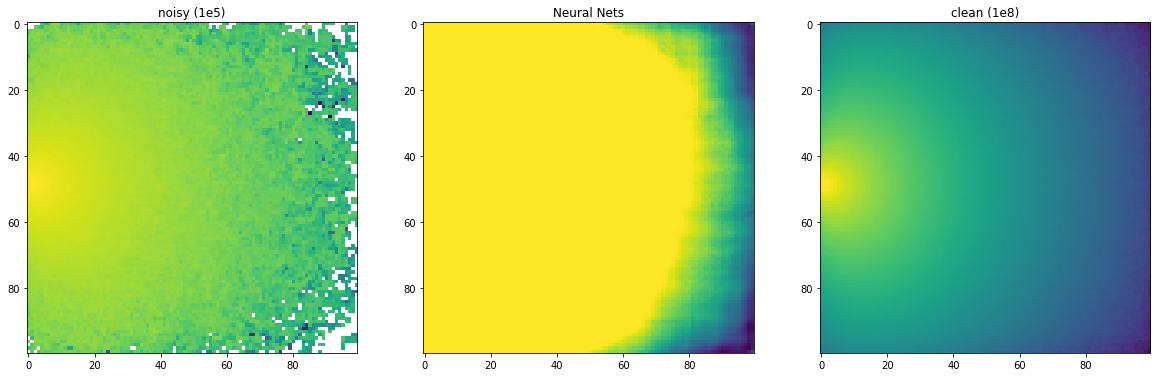

 image 48



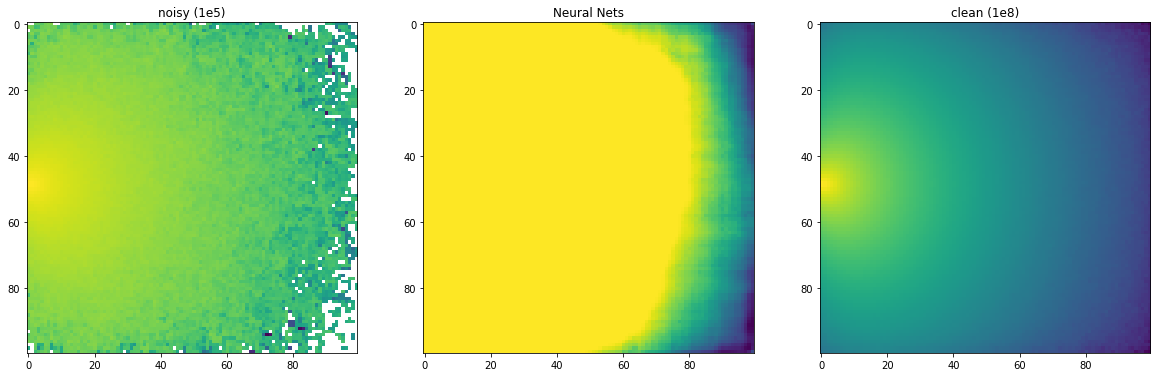

 image 49



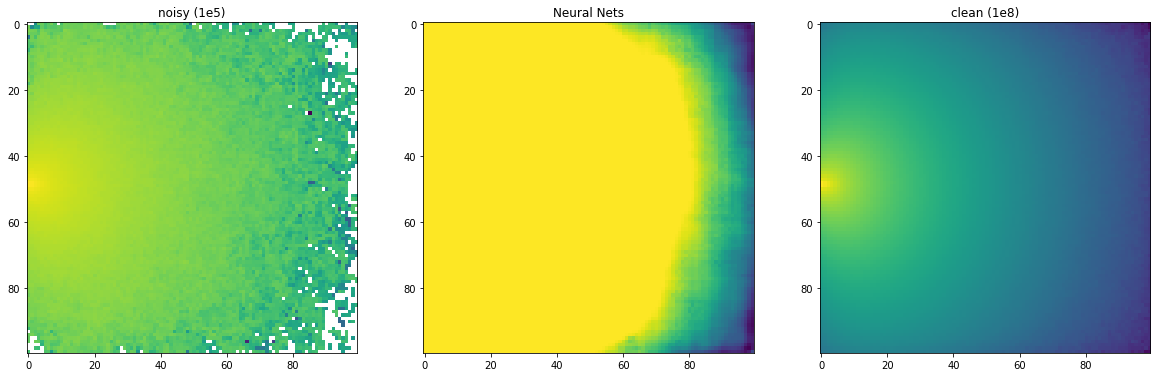

 image 50



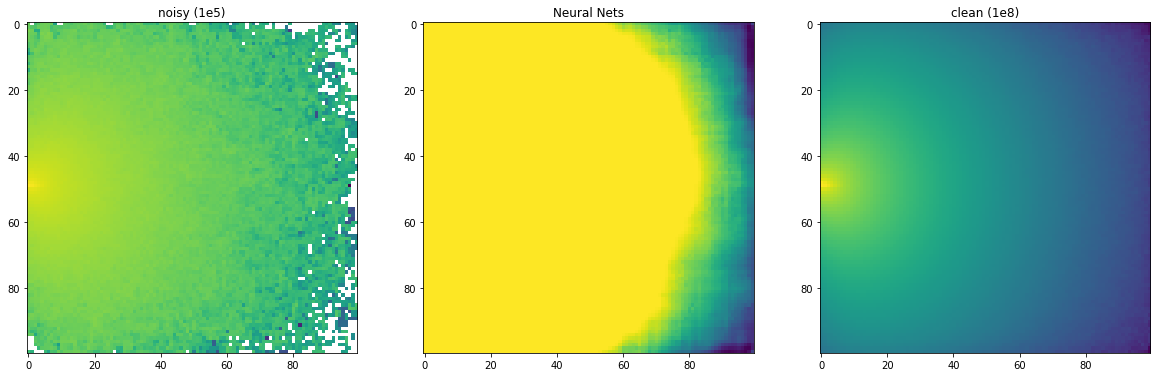

 image 51



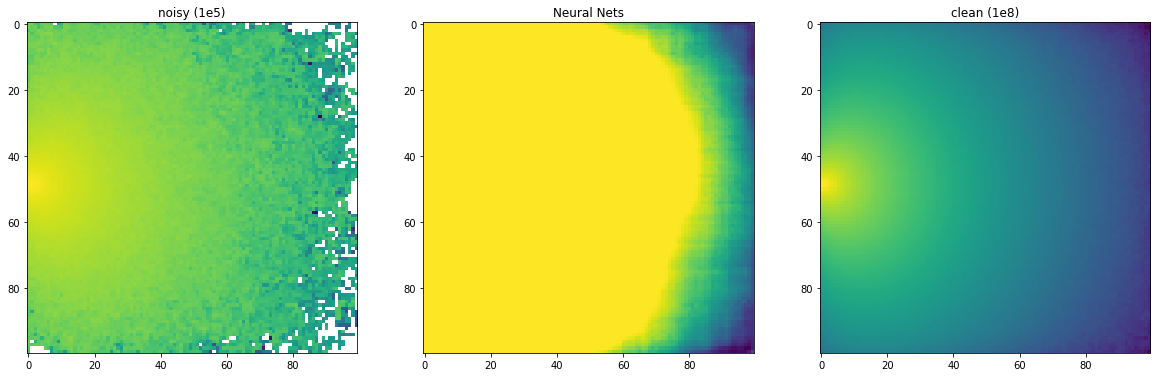

 image 52



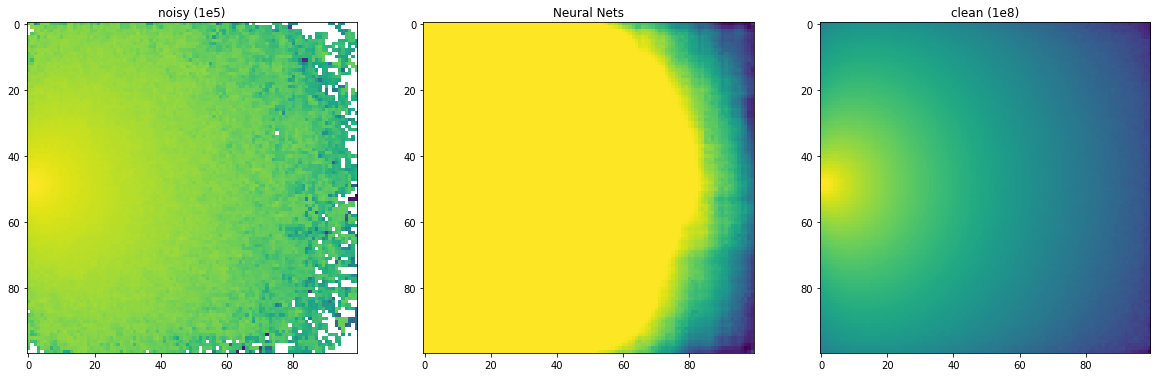

 image 53



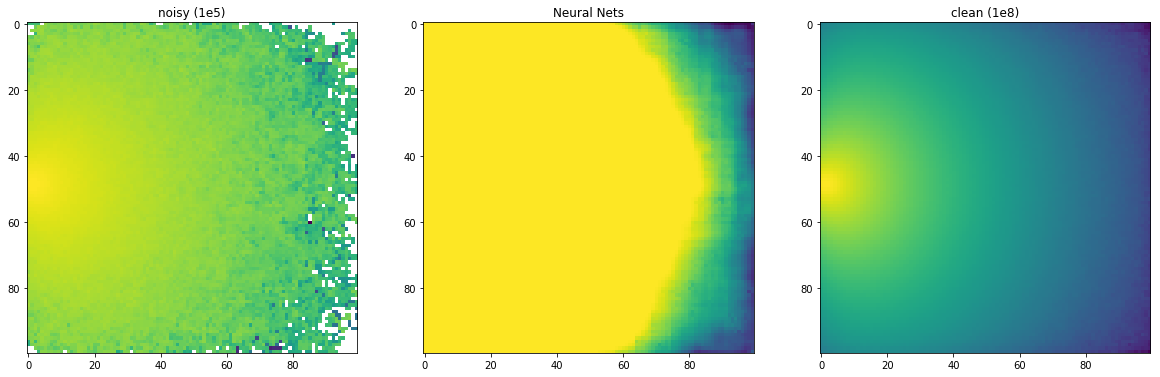

 image 54



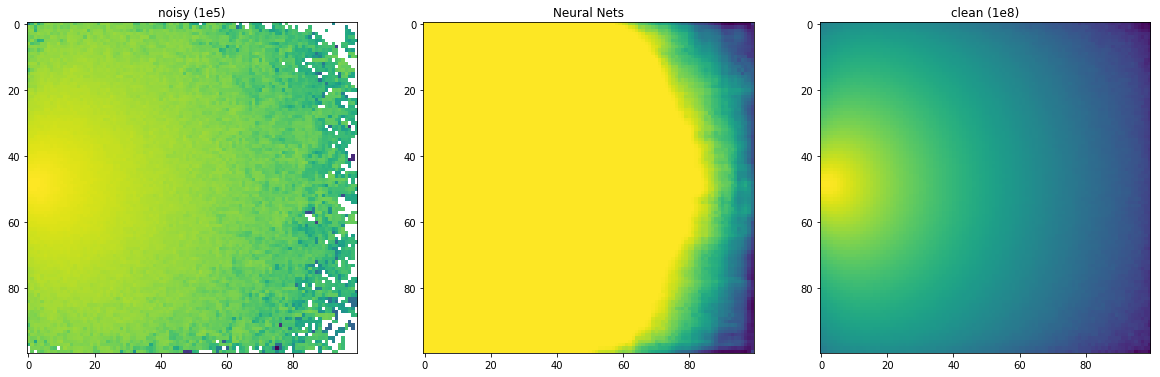

 image 55



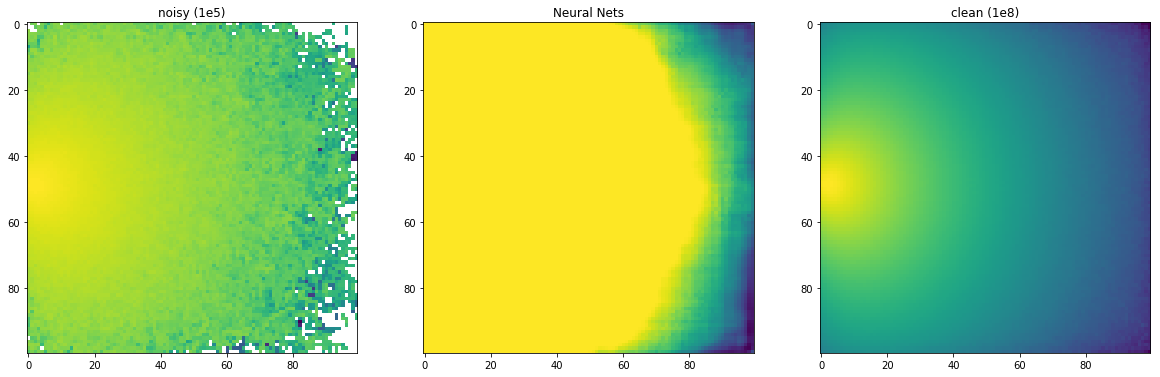

 image 56



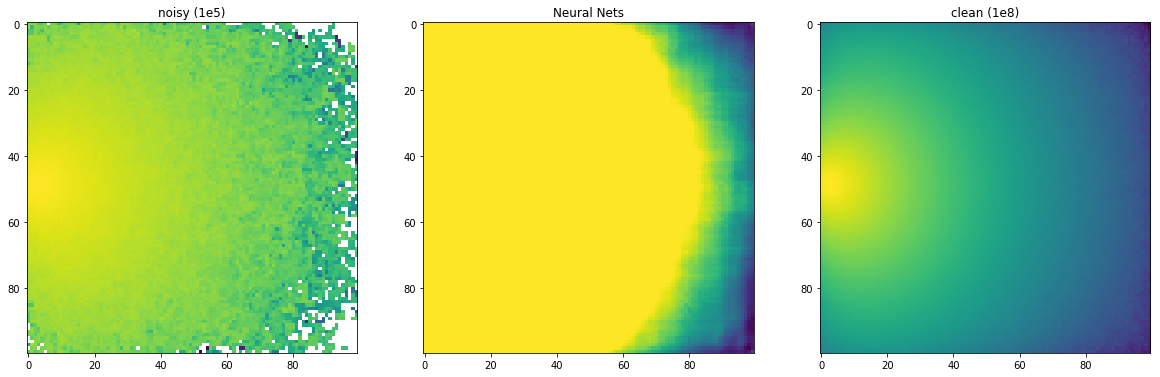

 image 57



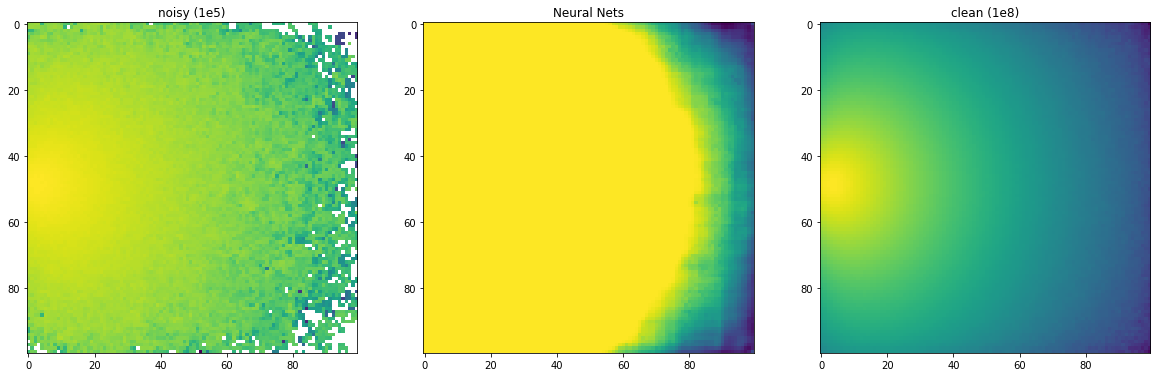

 image 58



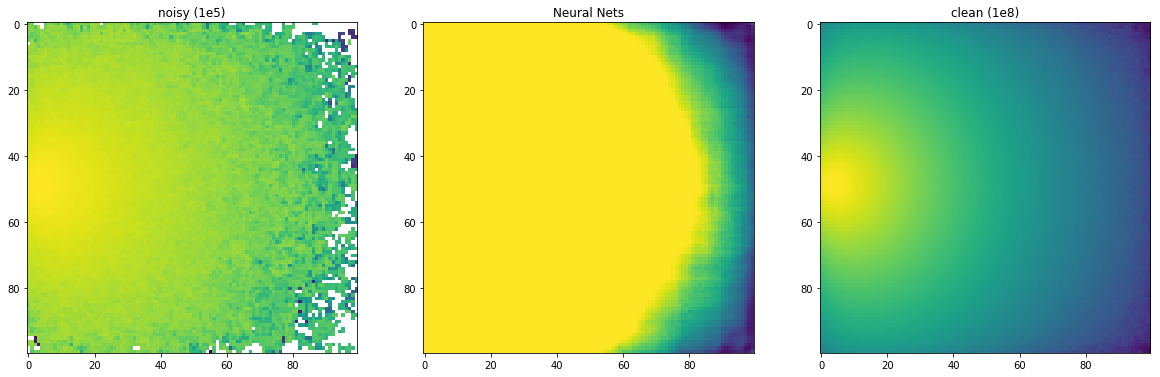

 image 59



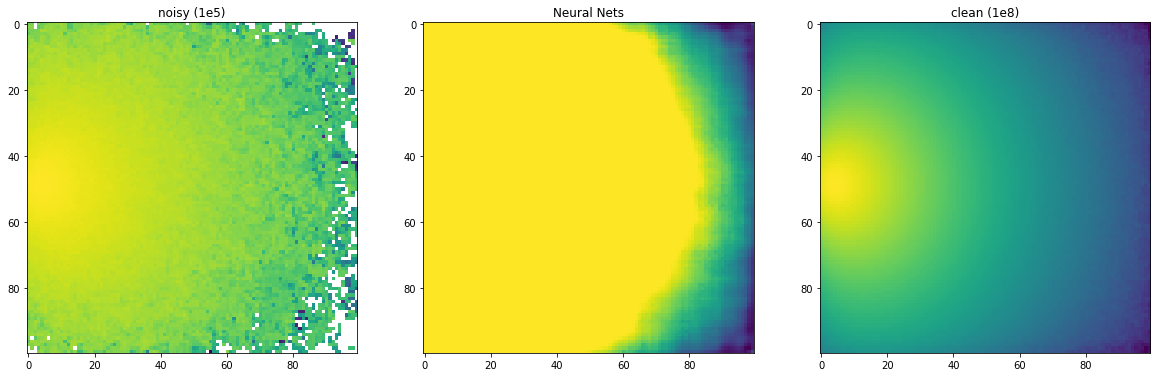

 image 60



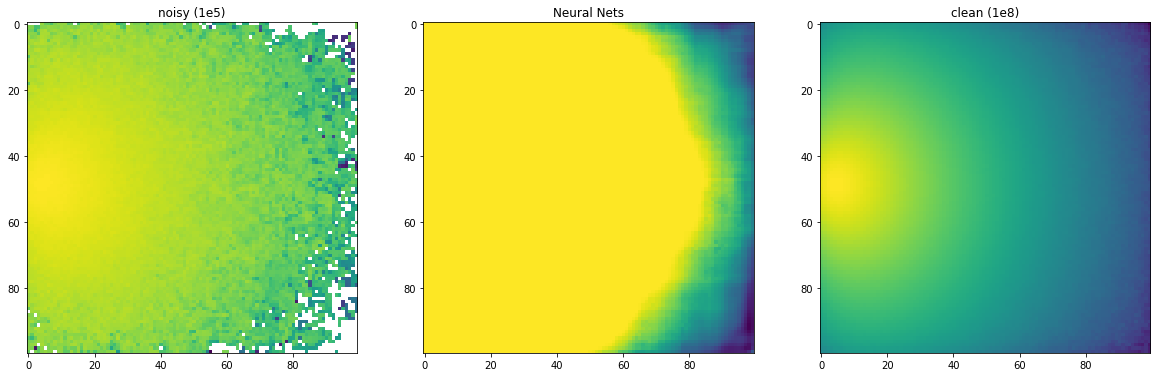

 image 61



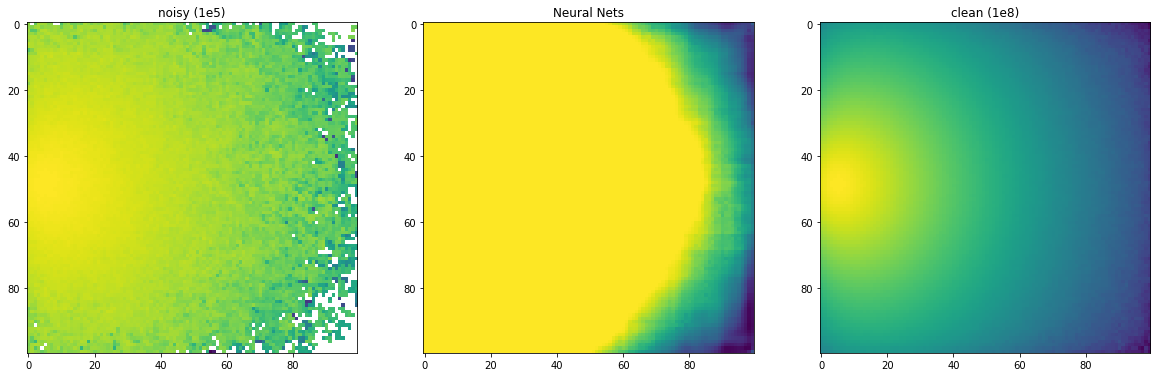

 image 62



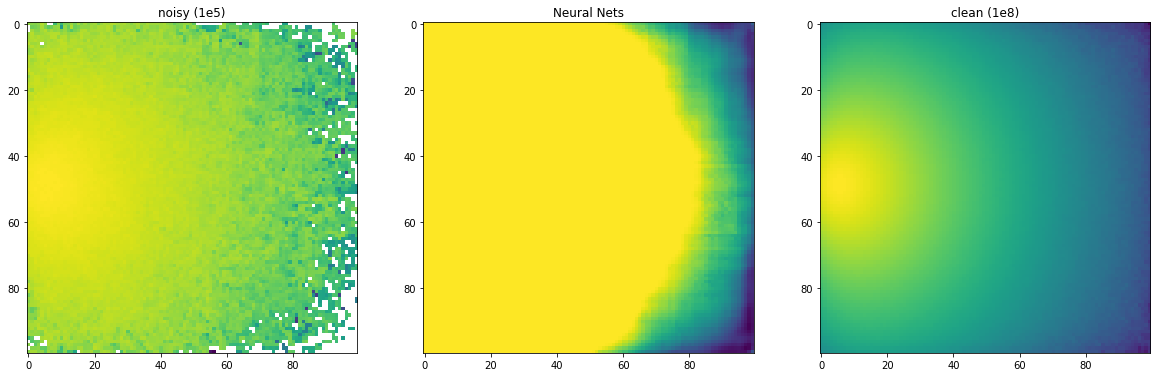

 image 63



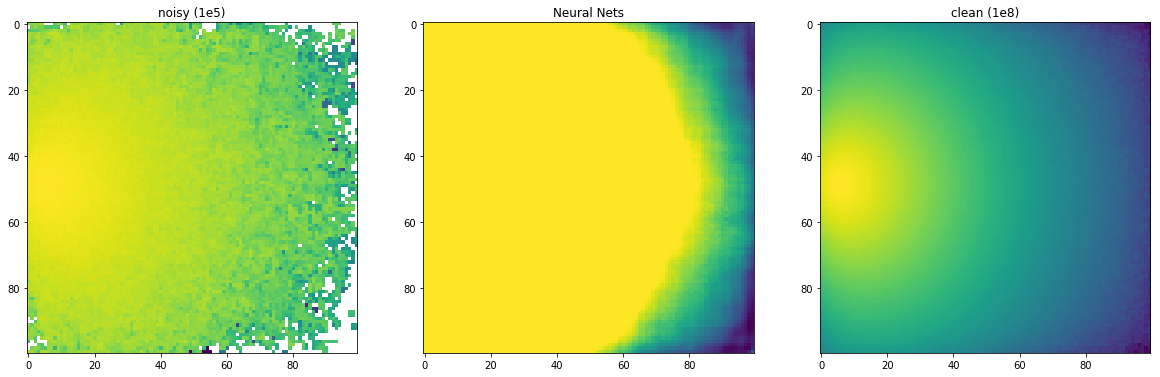

 image 64



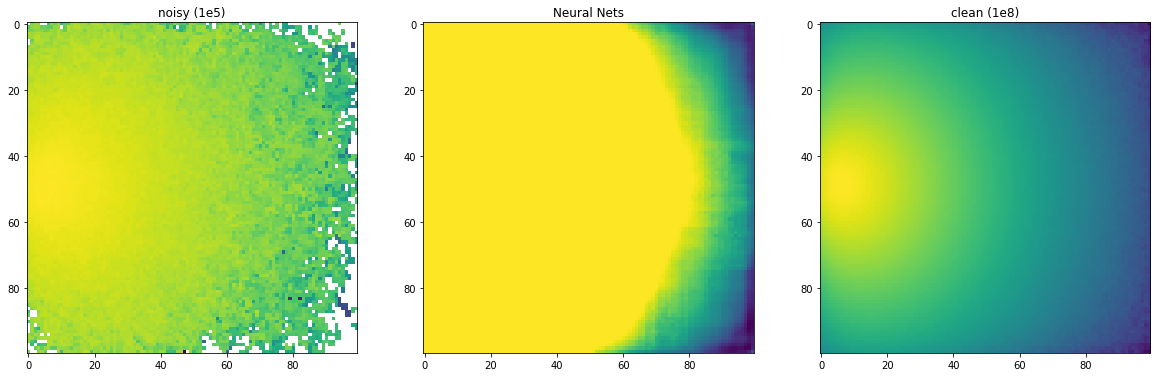

 image 65



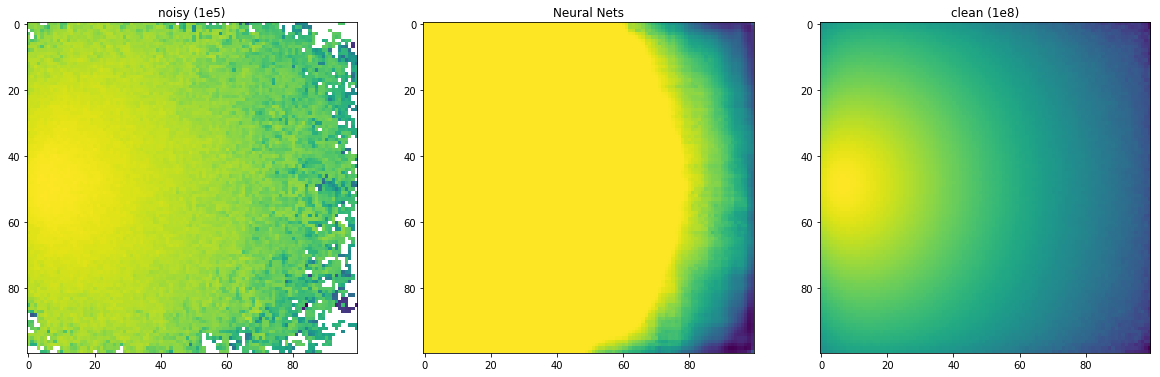

 image 66



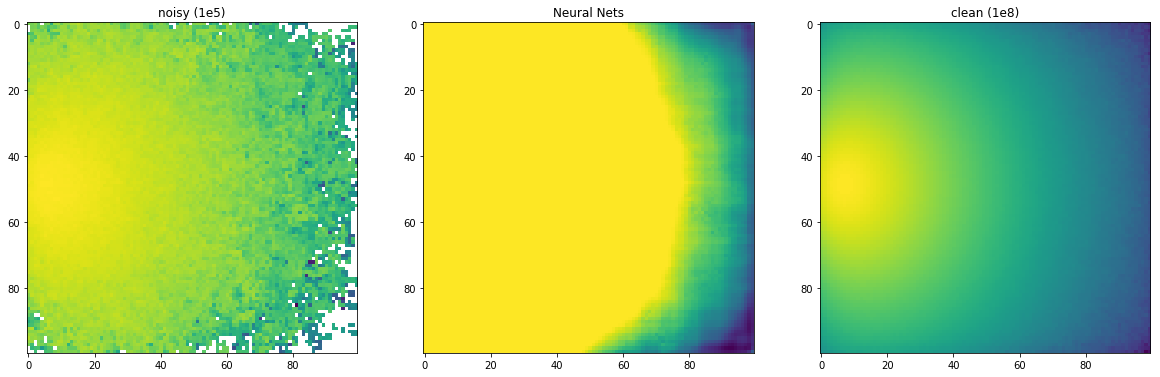

 image 67



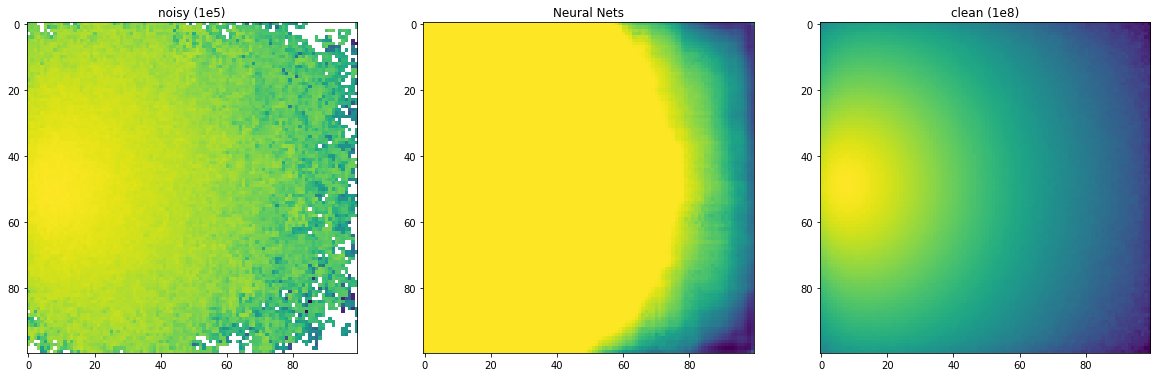

 image 68



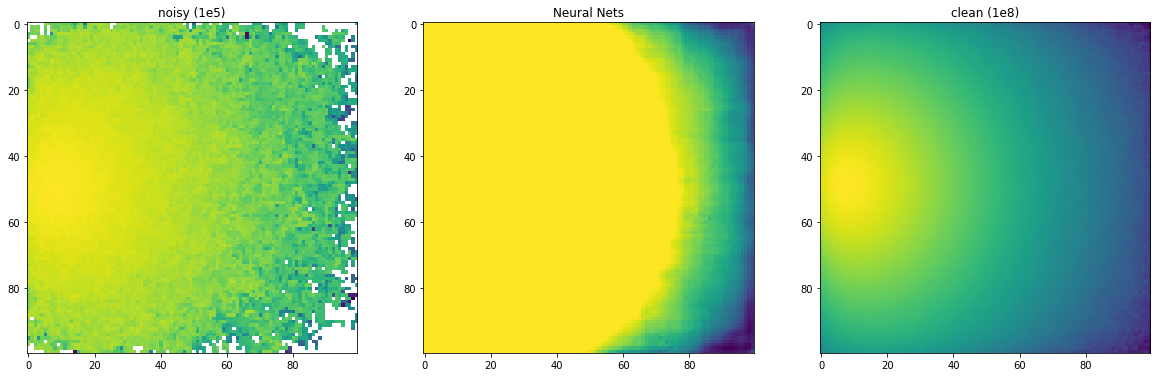

 image 69



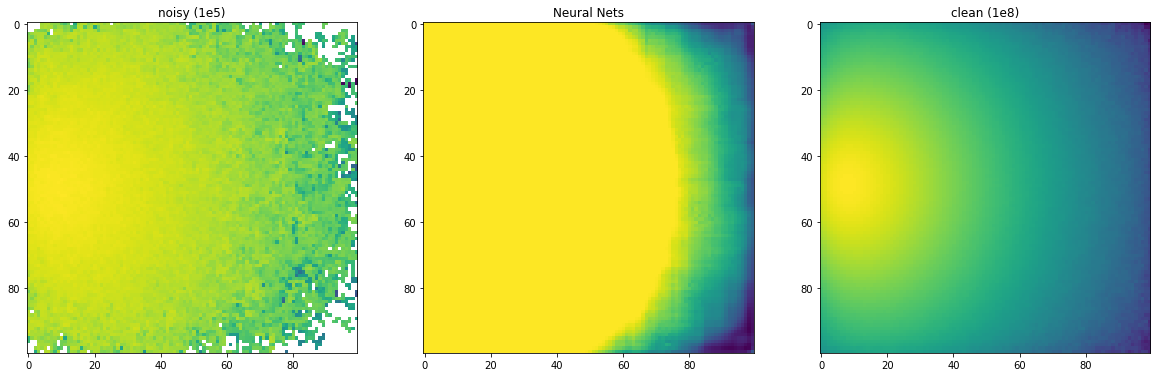

 image 70



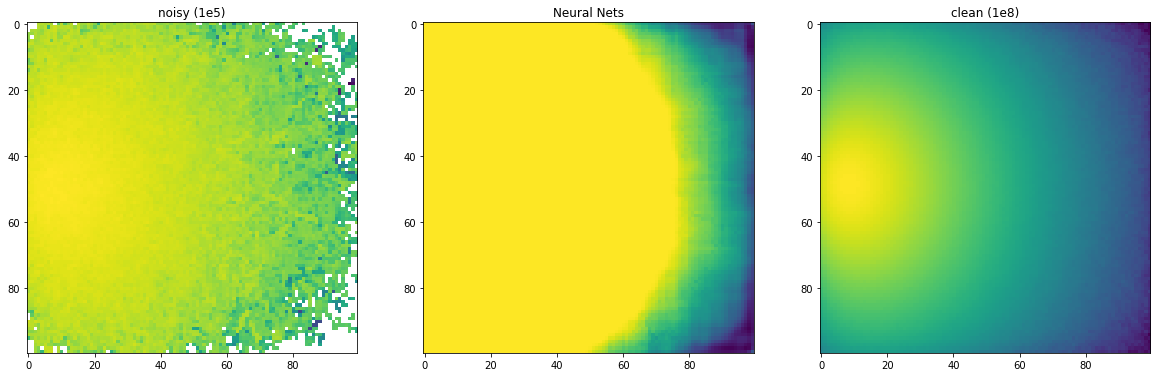

 image 71



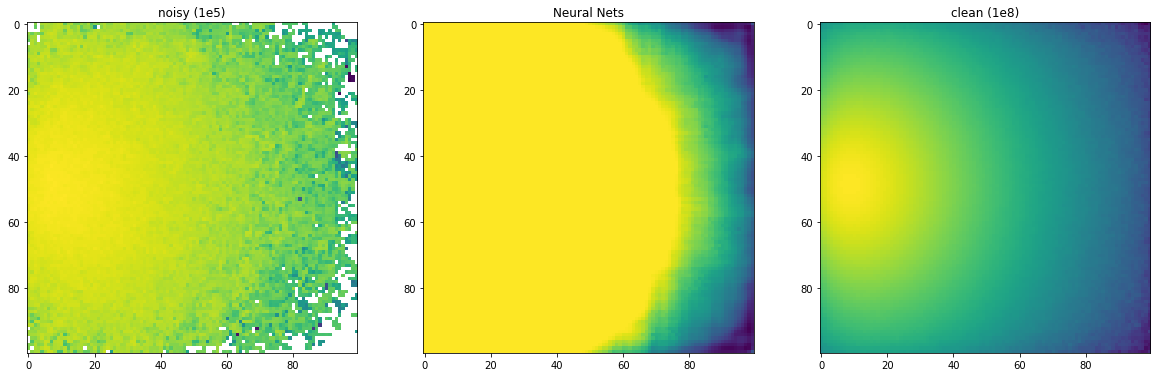

 image 72



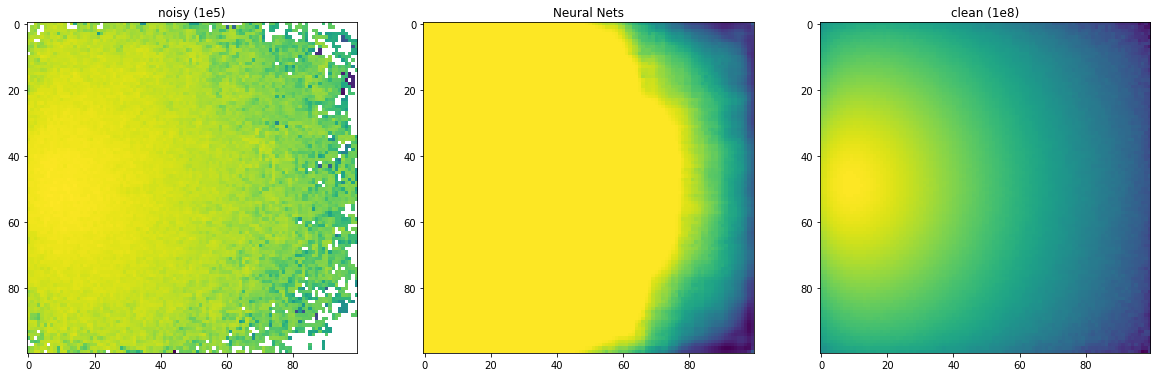

 image 73



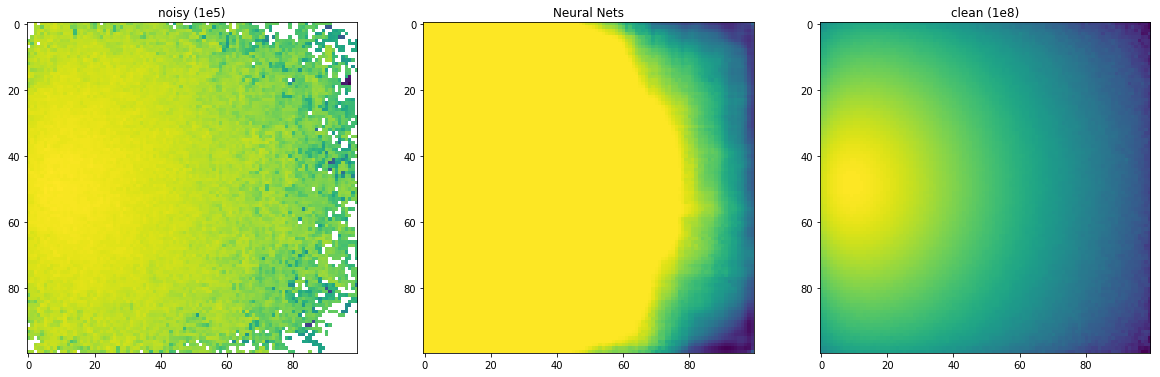

 image 74



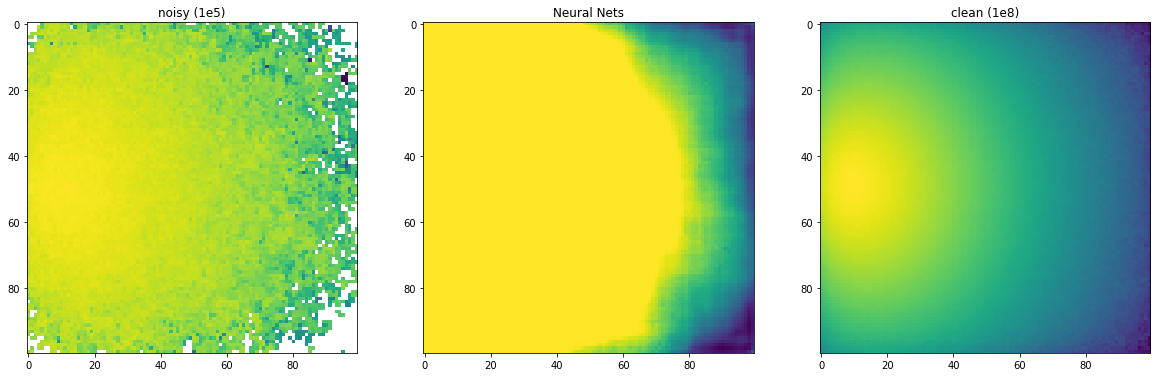

 image 75



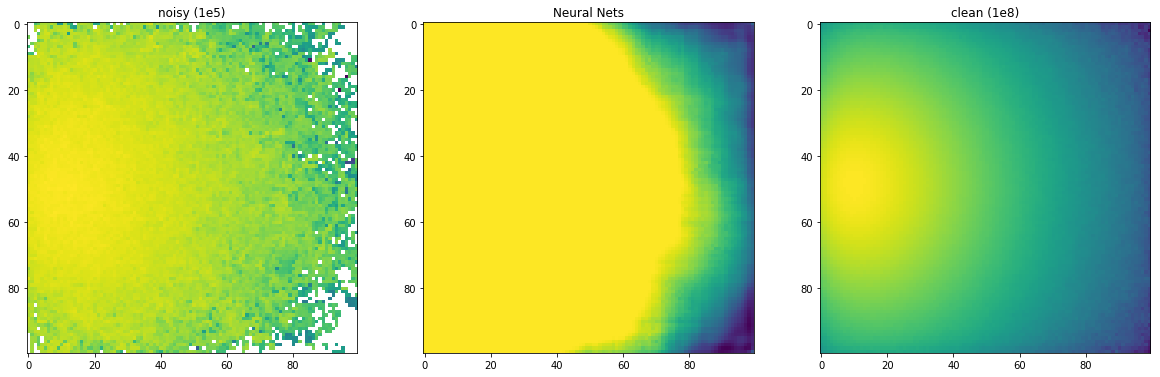

 image 76



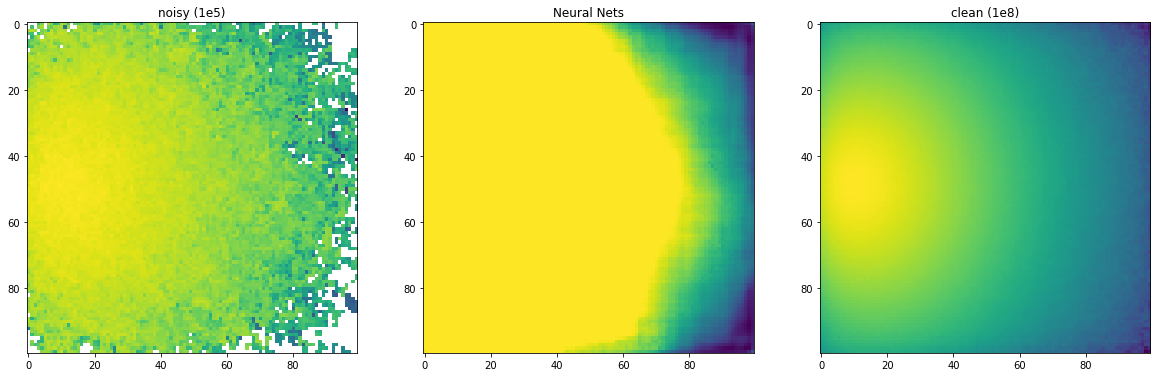

 image 77



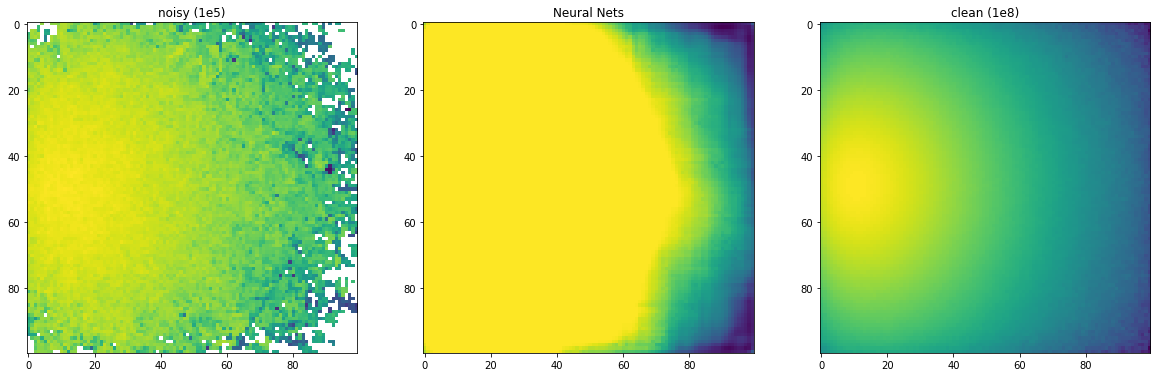

 image 78



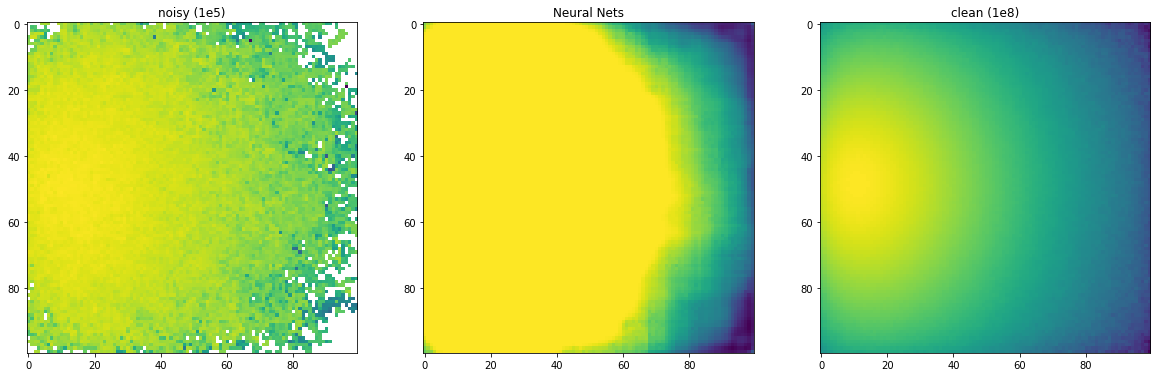

 image 79



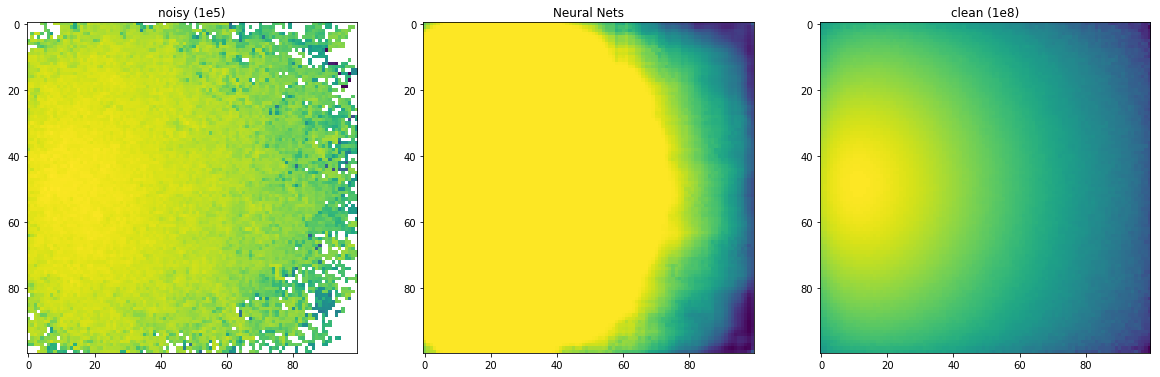

 image 80



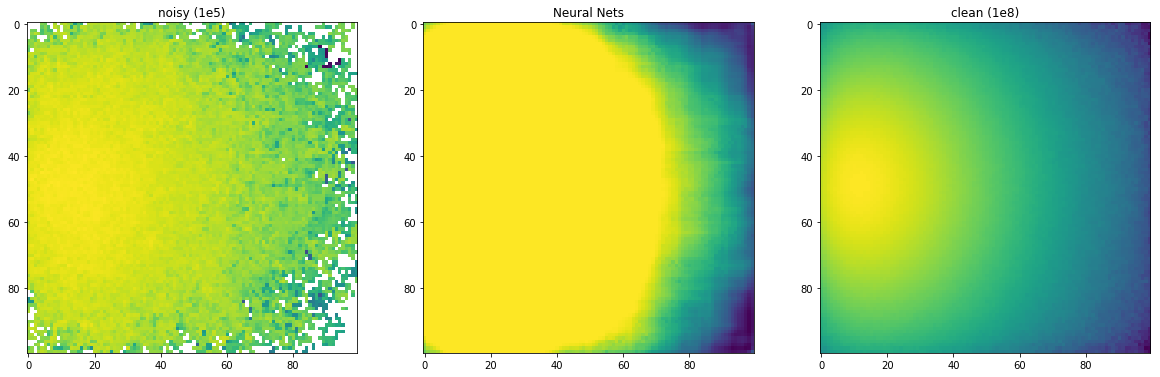

 image 81



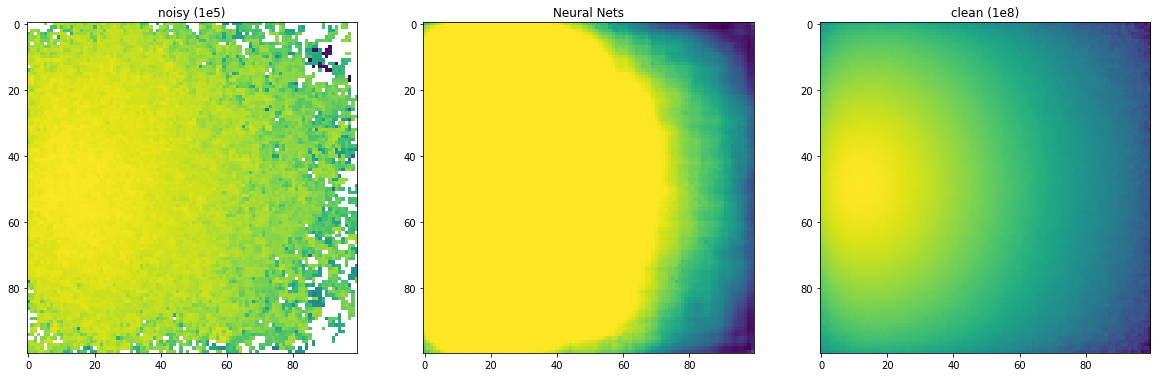

 image 82



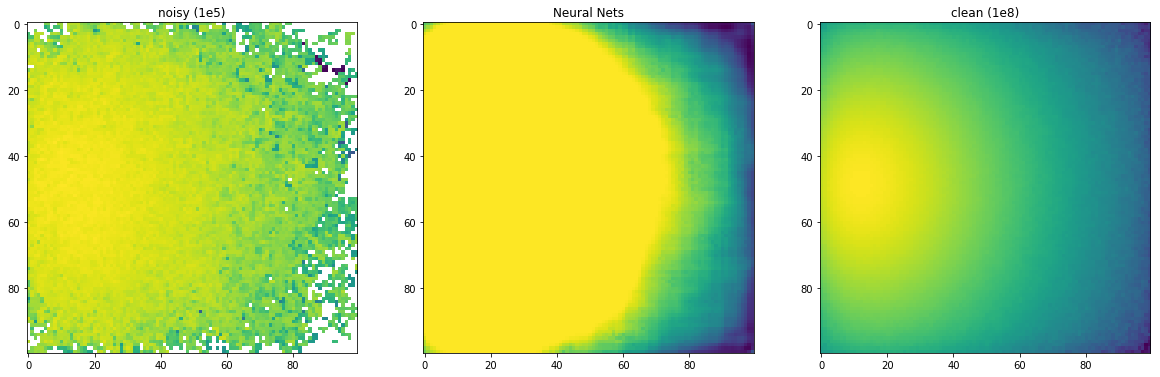

 image 83



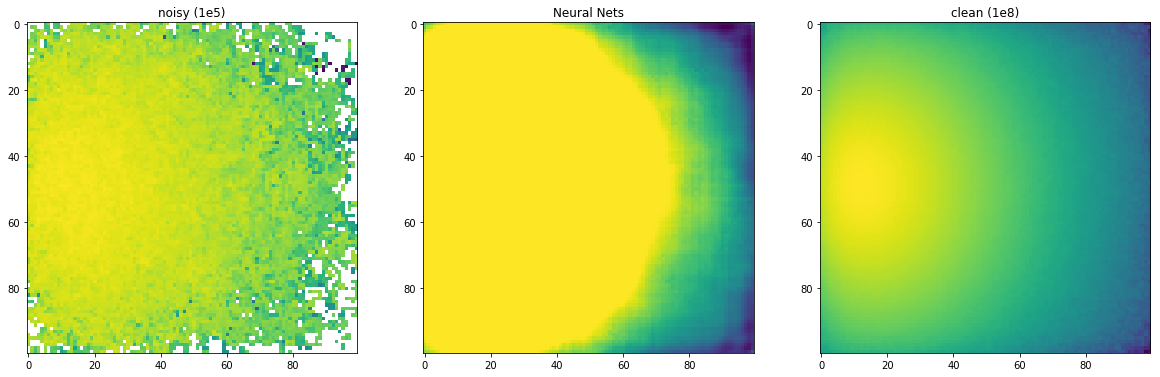

 image 84



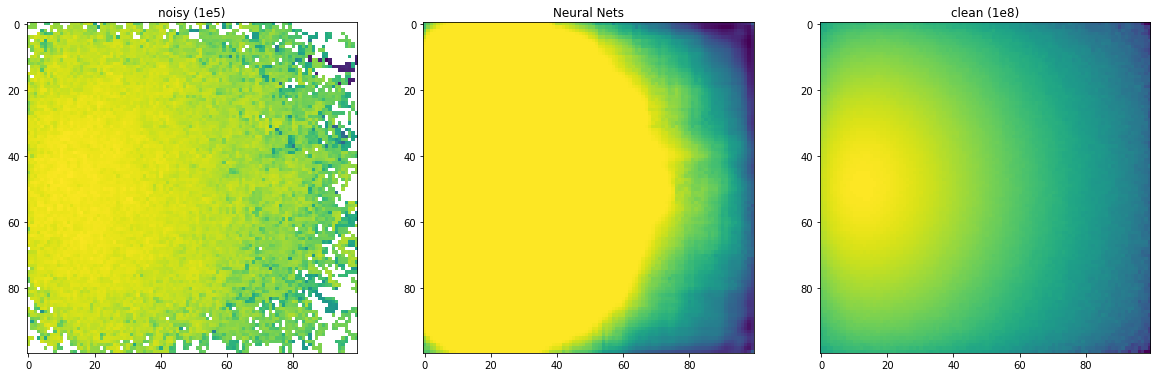

 image 85



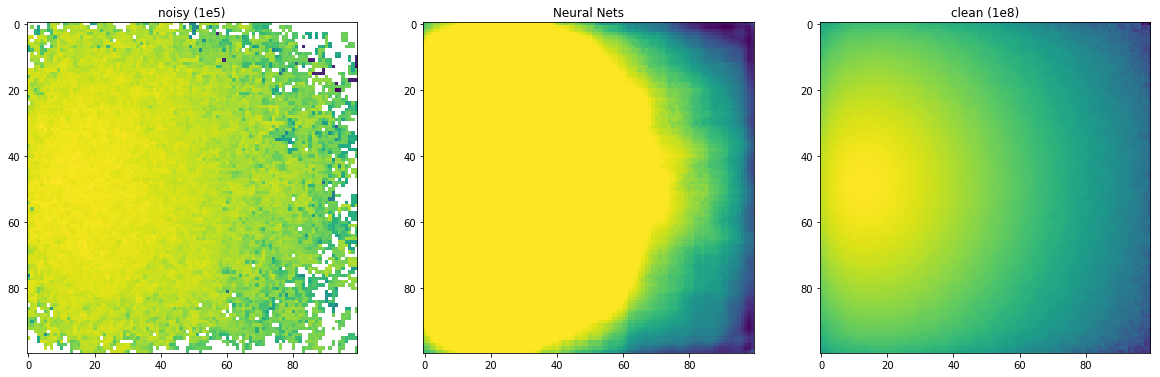

 image 86



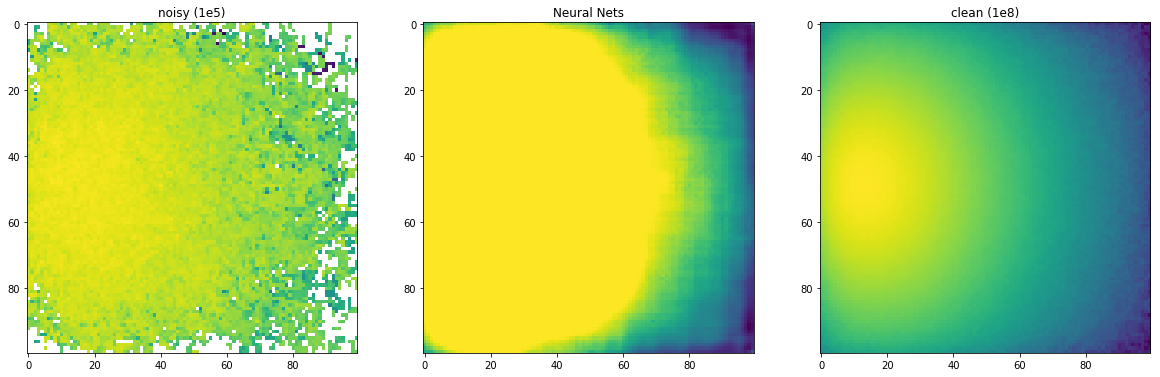

 image 87



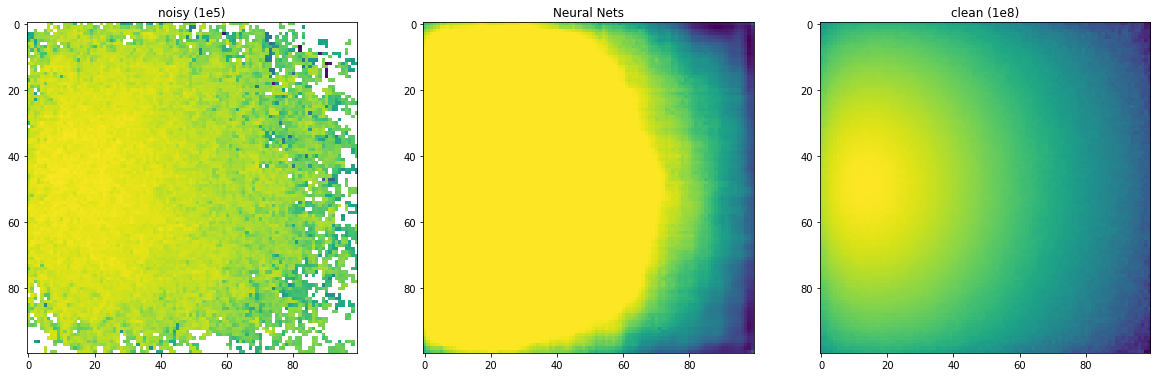

 image 88



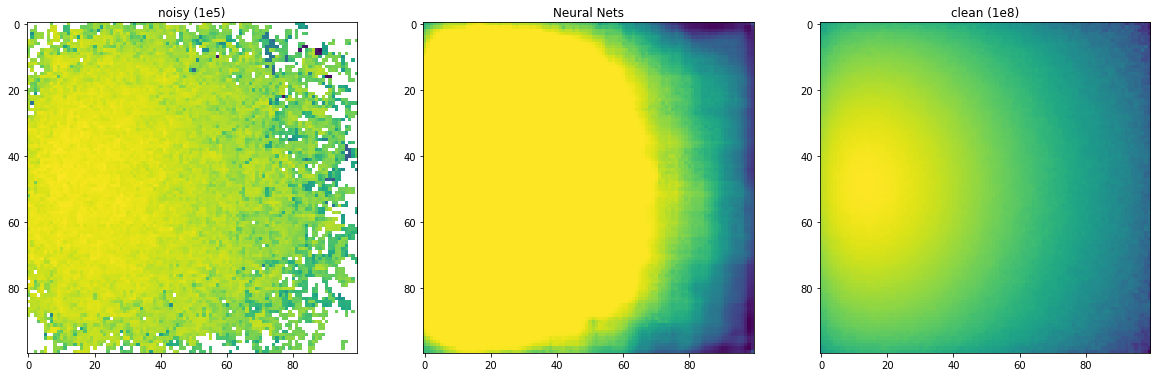

 image 89



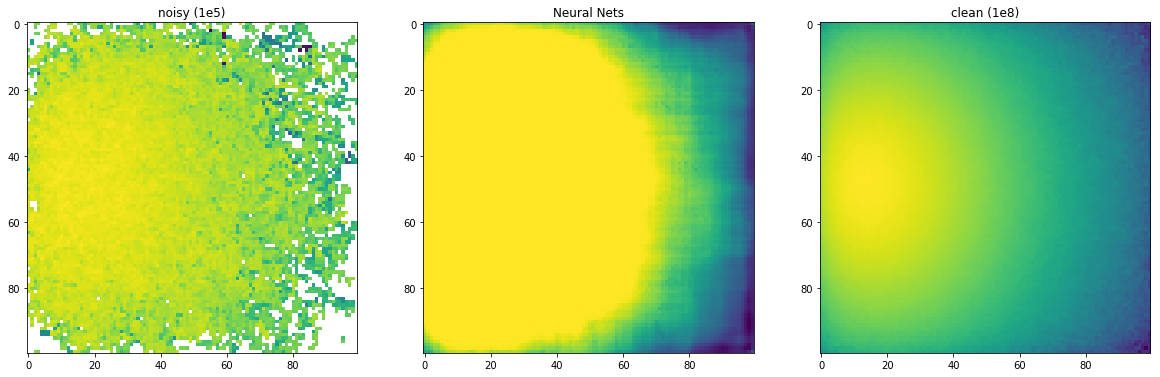

 image 90



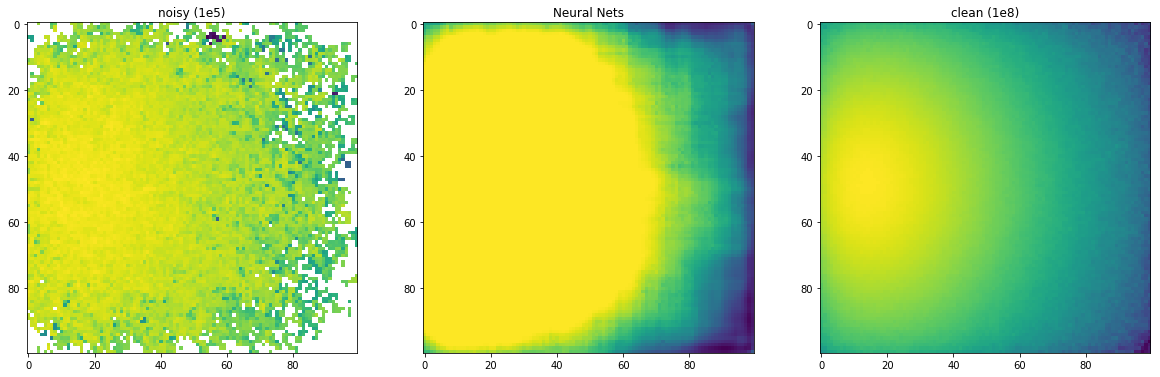

 image 91



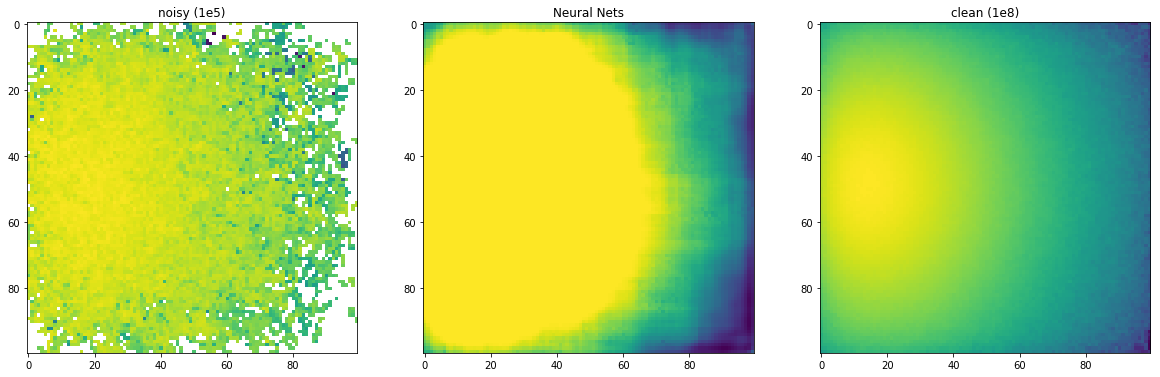

 image 92



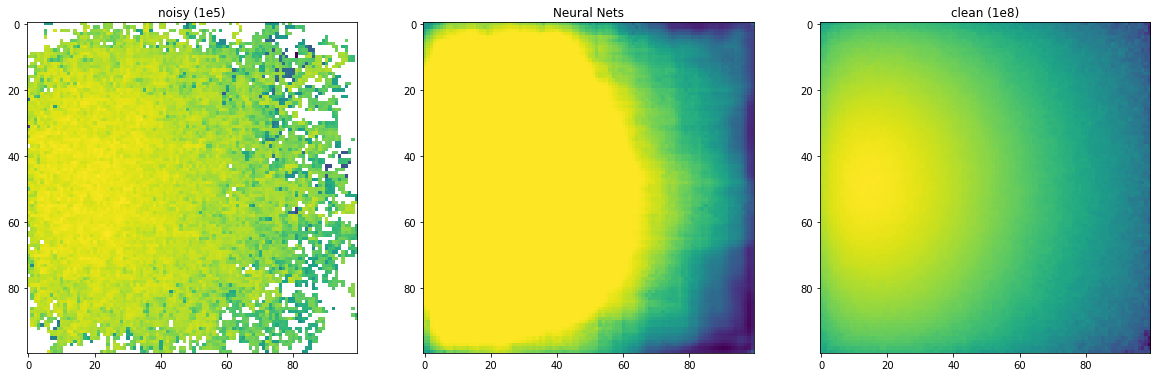

 image 93



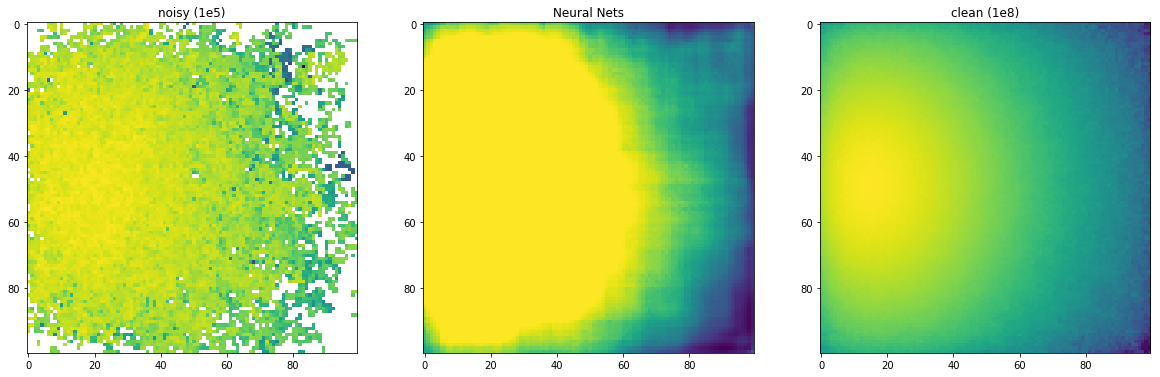

 image 94



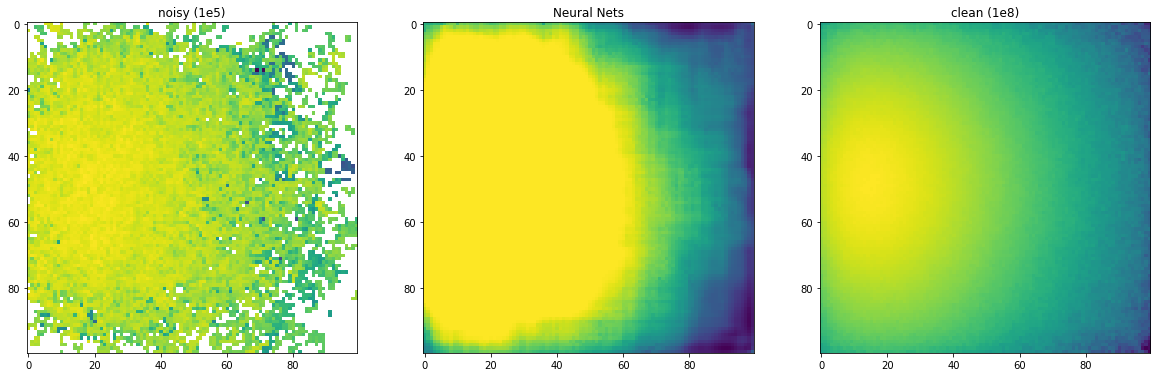

 image 95



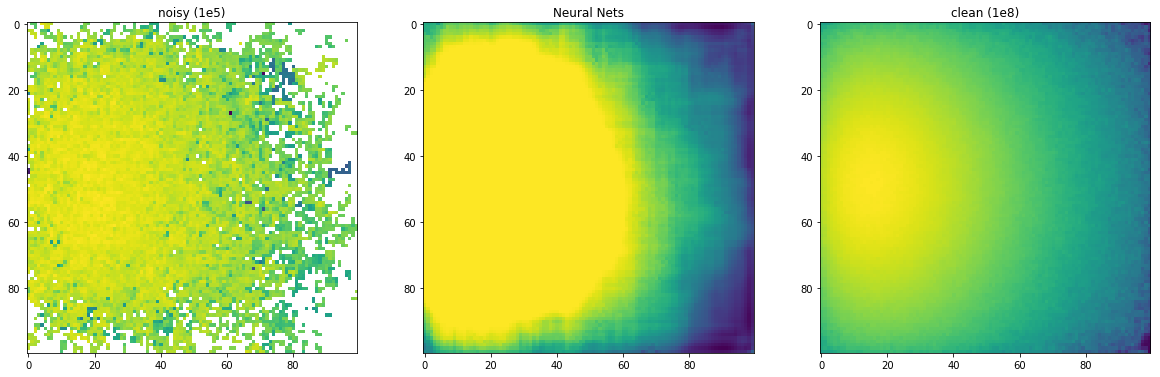

 image 96



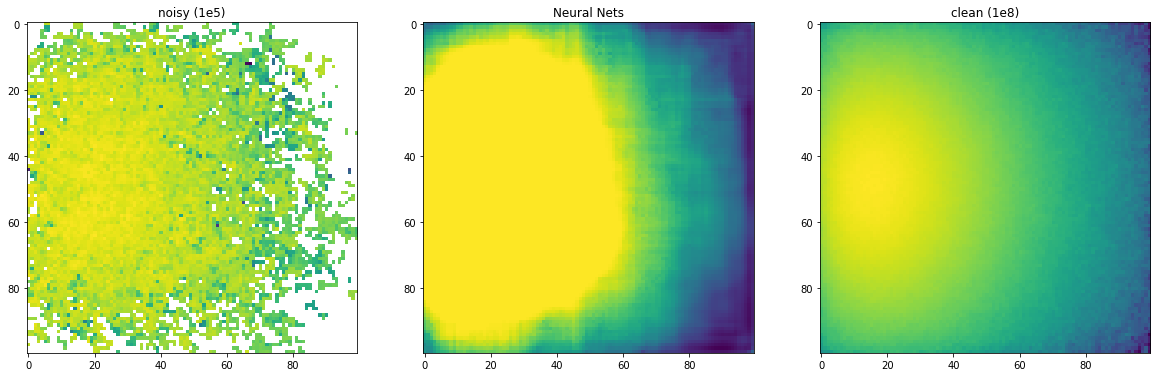

 image 97



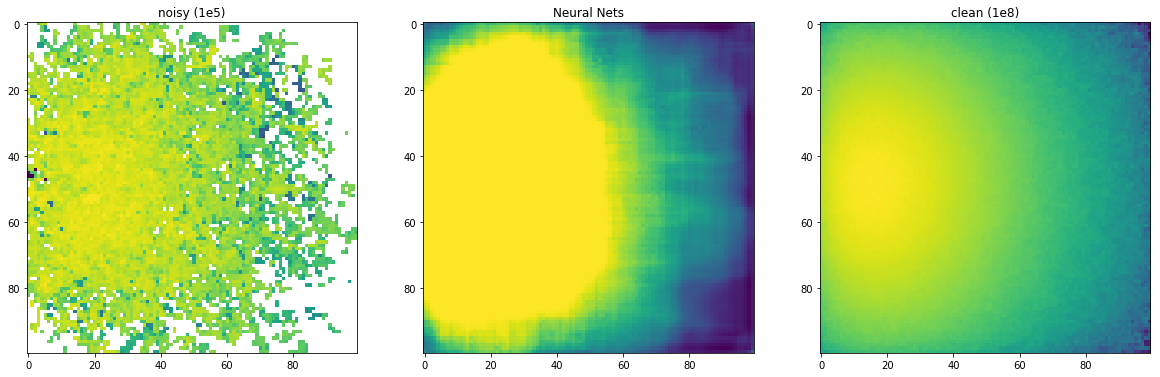

 image 98



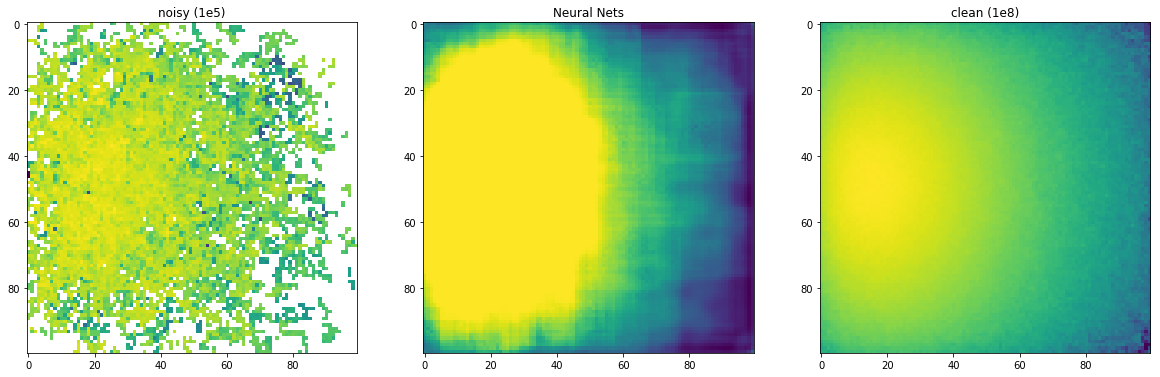

 image 99



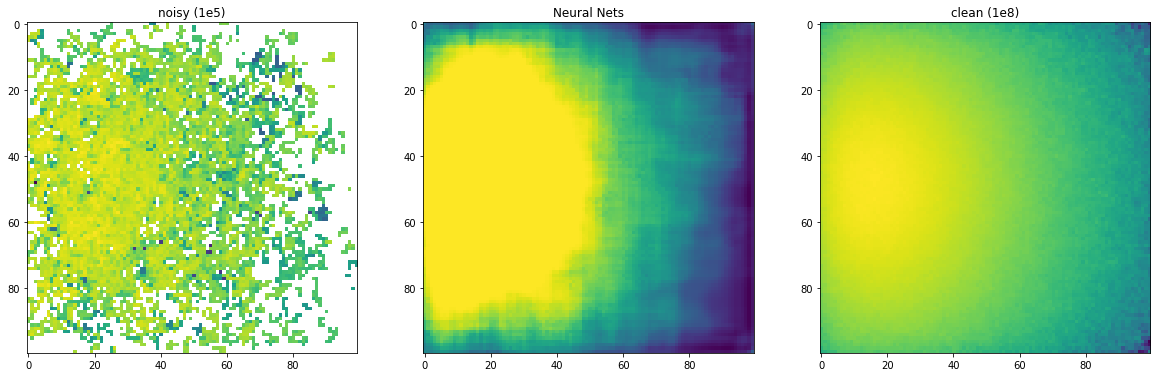

 image 100



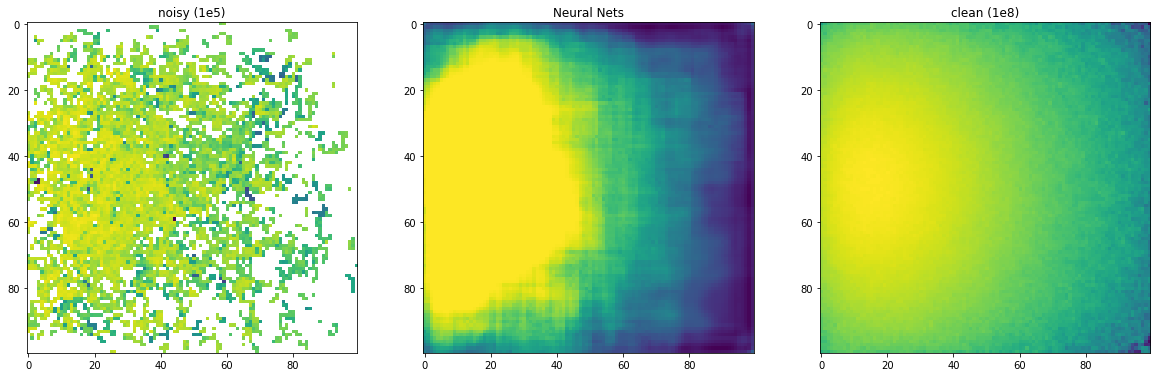

In [8]:
sum_diff = []

for i in xrange(1, 101):
    # =====================
    # load original image
    # =====================
    noisy1  = '../../data/osa-testing/1e+05/1/y/osa_phn1e+05_test1_img[X].mat'      
    noisy1 = noisy1.replace('[X]', str(i))
    #print noisy1
    noisy_mat = spio.loadmat(noisy1, squeeze_me=True)
    noisy_mat = noisy_mat['currentImage']
    #print noisy_mat.shape
    
    
    clean1  = '../../data/osa-testing/1e+08/1/y/osa_phn1e+08_test1_img[X].mat'      
    clean1 = clean1.replace('[X]', str(i))
    clean_mat = spio.loadmat(clean1, squeeze_me=True)
    clean_mat = clean_mat['currentImage']
    #print clean_mat.shape
    
    
    # =====================
    # load nn results
    # =====================
    nn_output = nn_mat[i-1, : , :]
    #print nn_output.shape
    
    # convert back to original scale
    nn_output = convert_data2org(nn_output, maxV = maxV)
    
    diff = np.sum(np.absolute(nn_output - clean_mat))
    #print diff
    sum_diff.append(diff)
    
    print " image %d\n"  % i
    
    
    
    plot_results(noisy_mat, nn_output, clean_mat, title='image-' + str(i))
    
    #break

In [9]:
sum_diff_array = np.array(sum_diff)
print np.mean(sum_diff_array)
print np.std(sum_diff_array)

11001157.0
20485442.0
